# SPRINT 4 GONZALO GIL

# Modelando la Pandemia

  En este proyecto vamos a estudiar y analizar los datos mundiales de la pandemia COVID-19 usando países modelo de distintas políticas públicas para luego interpretar otras curvas.

Puedes descargar el dataset de casos totales, divididos por país [aquí.](
https://ourworldindata.org/coronavirus-data?country=
) Descarga los datos  formato .csv luego podrás cargarlos en el notebook usando pandas, a partir de eso selecciona los de los países que te interesan, hay un ejemplo de cómo se hace esto en este notebook. 

# PRIMERA PARTE: ¿Cómo empezó la pandemia?


  La primer parte del trabajo consiste en estudiar cómo se empieza a propagar la pandemia, luego analizaremos las medidas tomadas y su efectividad.

  Al inicio de una pandemia, se estima que los contagios siguen una ley exponencial, esa es la fase de "crecimiento exponencial", luego hay un decaimiento dado por la inmunidad. 

  Los datos de casos confirmados en función del tiempo $C(t)$, pueden aproximarse con el modelo

$C(t)=e^{k(t-t_0)}$

donde $t_0$ es la fecha del primer contagio, y $k$ es un parámetro propio de cada enfermedad, que habla de la contagiosidad. Cuanto mayor es $k$, más grande será el número de casos confirmados dado por la expresión. $k$ depende de el tiempo que una persona enferma contagia, el nivel de infecciosidad del virus y cuántas personas que se pueden contagiar ve una persona enferma por día. Es decir, la circulación. Haciendo cuarententa, $k$ disminuye, con la circulación $k$ aumenta.

  El parámetro $k$ está directamente relacionado con el $R$ del que tanto se habla en los medios. En este proyecto haremos foco en $k$, pero puedes profundizar sobre esto si quieres, empezandó por [aquí](https://es.wikipedia.org/wiki/Ritmo_reproductivo_b%C3%A1sico). 

  Es posible hacer un modelo completo, pero para eso es necesario utilizar ecuaciones diferenciales. Si quieres profundizar sobre eso, busca información sobre "modelo epidemiológico SEIR". Si quieres ver cómo funciona este modelo, puedes empezar por [aquí](http://gabgoh.github.io/COVID/index.html). En ese link está implementado el modelo SEIR (no es necesario entender las ecuaciones en este caso) y el rol que cumplen los parámetros, puedes explorar el impacto de variar $R$ y el resto de los valores para ver cómo impactan en la cirva de contagios. Ahora utilizaremos la siguiente expresión para describir únicamente la etapa de crecimiento exponencial.


  Comienza estudiando cómo se distribuyó el $k$ inicial de la pandemia y si es posible elaborar un intervalo de confianza razonable para este valor. Para eso 
  
  1. Elegir diez países del norte (ahí empezó la pandemia) y puedes mide el valor de $k$ inicial de la pandemia, analizando datos del primer tramo.

  2. Analiza si es posible estimar la evolución mundial de la pandemia a partir de lo que obtuviste. Para esto, puedes elaborar un intervalo de confianza para $k$ a partir de los que obtuviste y así generar un modelo nuevo, basado en la distribución de $k$. Luego compara el modelo con los datos mundiales.

3. Piensa qué significa que el modelo de "bien" o dé "mal" ¿qué indicadores de esto existen?. Luego discute en el informe por qué crees que dio así. Recuerda que es importante elegir bien la población de muestra. Piensa qué criterios puedes elegir para representar bien la población mundial que se contagió al inicio de la pandemia.

## EXPLORACIÓN DE DATOS Y MEDICIÓN DE K

In [1]:
import numpy as np
import pandas as pd
import pylab as plt
from scipy.optimize import curve_fit
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
datos= pd.read_csv(r"C:\Users\gonzalo.gil\Desktop\Gonza\DS Acamica\Datasets\covid-tests-cases-deaths.csv")

In [3]:
print ("El dataset tiene ", datos.index.shape[0], " filas");
print ("El dataset tiene ", datos.columns.shape[0], " columnas");
print ("Por lo tanto el dataset es de  [",datos.index.shape[0],"x",datos.columns.shape[0],"]");
print("\nDiez primeras instancias: ");
datos.head(10)

El dataset tiene  135124  filas
El dataset tiene  7  columnas
Por lo tanto el dataset es de  [ 135124 x 7 ]

Diez primeras instancias: 


,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19
0,Afghanistan,AFG,2020-03-23,NaN,NaN,1.0,40.0
1,Afghanistan,AFG,2020-03-24,NaN,NaN,1.0,42.0
2,Afghanistan,AFG,2020-03-25,NaN,NaN,1.0,74.0
3,Afghanistan,AFG,2020-03-26,NaN,NaN,2.0,80.0
4,Afghanistan,AFG,2020-03-27,NaN,NaN,2.0,91.0
5,Afghanistan,AFG,2020-03-28,NaN,NaN,2.0,106.0
6,Afghanistan,AFG,2020-03-29,NaN,NaN,4.0,114.0
7,Afghanistan,AFG,2020-03-30,NaN,NaN,4.0,114.0
8,Afghanistan,AFG,2020-03-31,NaN,NaN,4.0,166.0
9,Afghanistan,AFG,2020-04-01,NaN,NaN,4.0,192.0


In [4]:
paises=datos['Entity'].unique()#cargo el vector de paises
print('Los paises que contiene el dataset son: \n', paises)

Los paises que contiene el dataset son: 
 ['Afghanistan' 'Africa' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Asia' 'Asia excl. China'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Canada, people tested' 'Cape Verde' 'Central African Republic' 'Chad'
 'Chile' 'China' 'Colombia' 'Comoros' 'Congo' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Democratic Republic of Congo'
 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Europe' 'European Union' 'Fiji' 'Finland' 'France' 'Gabon'
 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala'
 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'High income' 'Honduras'
 '

In [5]:
confirmados=datos['Total confirmed cases of COVID-19'] #carga vector todos los casos confirmados
print ('\nLos casos confirmados por día de COVID-19 son: \n', confirmados)


Los casos confirmados por día de COVID-19 son: 
 0             40.0
1             42.0
2             74.0
3             80.0
4             91.0
            ...   
135119      6837.0
135120    139046.0
135121         1.0
135122         3.0
135123         3.0
Name: Total confirmed cases of COVID-19, Length: 135124, dtype: float64


Puedo observar que de un día para el otro, tengo 139046 confirmados y al otro día tengo 1 caso. Esto indica algúna desorganización de los datos.

In [6]:
print('La cantidad de paises es',len(datos['Entity'].unique()))

La cantidad de paises es 215


In [7]:
columnas = list(datos.columns)
print(columnas)

['Entity', 'Code', 'Day', 'total_tests', '142601-annotations', 'Total confirmed deaths due to COVID-19', 'Total confirmed cases of COVID-19']


Puedo decir que las columnas que más me interesan son: 
 - Entity o Code: Países
 - Day: Fecha 
 - Total test: Testeos realizados 
 - Total confirmed deaths due to COVID-19 : Casos confirmados 
 - Total confirmed cases of COVID-19: Casos confirmados 

In [8]:
print ("Datos faltantes: ")
print(datos.isna().sum())

Datos faltantes: 
Entity                                        0
Code                                      12532
Day                                           0
total_tests                               75368
142601-annotations                        77144
Total confirmed deaths due to COVID-19    13363
Total confirmed cases of COVID-19          1840
dtype: int64


In [9]:
datos.describe()

,total_tests,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19
count,5.975600e+04,1.217610e+05,1.332840e+05
mean,1.295053e+07,9.087951e+04,3.780073e+06
std,5.208780e+07,4.456131e+05,2.031215e+07
min,0.000000e+00,1.000000e+00,1.000000e+00
25%,2.908815e+05,8.900000e+01,2.670000e+03
50%,1.482981e+06,8.500000e+02,3.209850e+04
75%,6.407540e+06,8.106000e+03,3.151182e+05
max,6.699385e+08,5.255859e+06,2.658641e+08


## ESTUDIO DE CURVAS Y MODELADO

In [10]:
# Cargo el vector de paises
# ==============================================================================
paises=datos['Entity'] 

# Carga vector todos los casos confirmados
# ==============================================================================
confirmados=datos['Total confirmed cases of COVID-19'] 

Vemos el comportamiento de la curva MUNDIAL, luego analizamos por países

Text(0.5, 1.0, 'Cantidad de casos mundiales acumulados')

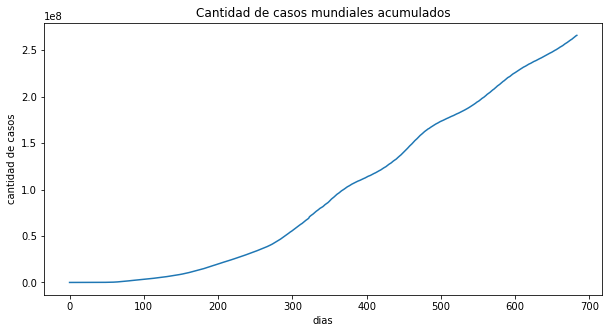

In [11]:
ind_world=np.where(paises=='World')
ind_world=ind_world[0]
casos_world=confirmados[ind_world]
dias_world=np.arange(0,len(casos_world))

plt.figure(figsize = (10,5))
plt.plot(dias_world,casos_world)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')
plt.title('Cantidad de casos mundiales acumulados')

Curva de **casos totales** mundiales acumulados. 

Text(0.5, 1.0, 'Cantidad de casos mundiales acumulados usando ventana de 100 dias')

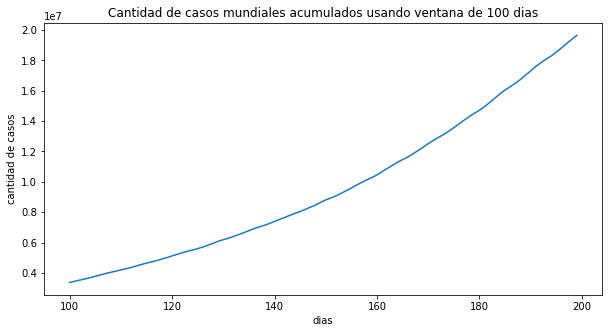

In [12]:
# Uso una ventana para ver el crecimiento exp.

casos_principio = casos_world[100:200]
dias_principio = dias_world[100:200]

plt.figure(figsize = (10,5))
plt.plot(dias_principio,casos_principio)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')
plt.title('Cantidad de casos mundiales acumulados usando ventana de 100 dias')

Esta es la curva anterior, pero con zoom entre los días 100 y 200

Text(0.5, 1.0, 'Log Cantidad de casos acumulado del Mundo')

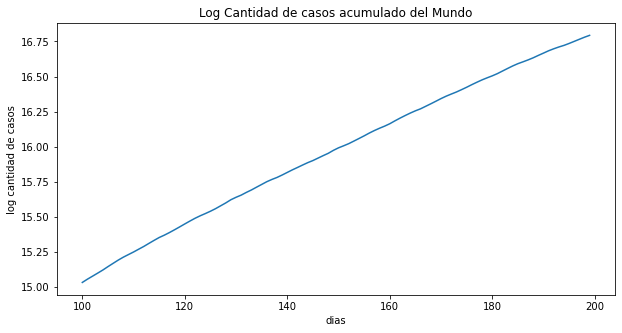

In [13]:
#APLICO LOGARITMO Y GRAFICO PARA VER SI ES EXPONENCIAL

plt.figure(figsize = (10,5))
plt.plot(dias_principio,np.log(casos_principio))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')
plt.title('Log Cantidad de casos acumulado del Mundo')

PUEDO OBSERVAR QUE AHORA EL GRÁFICO ES UNA LINEA RECTA. CON ESTA ESCALA , LO QUE LOGRO ES AJUSTAR LA ESCALA EN CUANTO A 
LAS DIFERENCIAS EXISTENTES ENTRE CASOS POR DÍA DE LOS DÍFERENTES PAÍSES, PAÍSES CON GRANDES CANTIDADES DE CASOS, COMPARADOS CON PAÍSES QUE TENÍAN MENOS CASOS POR DÍA.
APLICANDO LOGARITMO Y OBSERVANDO UNA LINEA RECTA, INDICA QUE LA CURVA ORIGINAL ES EXPONENCIAL. 


 Aprovecho esto para averiguar el $k$ utilizando un ajuste hecho con el método de cuadrados mínimos, ajustando los datos al modelo 

$Confirmados=e^{k(t-t_0)}$



In [14]:
#Defino mi función para ajustar el modelo 

def exponencial(t,k,t0):
  C = np.exp(k*(t-t0))
  return C

In [15]:
#Ajusto mi curva a la exponencial

popt, pcov = curve_fit(exponencial, dias_principio, casos_principio, maxfev = 2000)
popt

array([ 1.71264047e-02, -7.83182803e+02])

Text(0.5, 1.0, 'Cantidad de casos simulados y reales del Mundo')

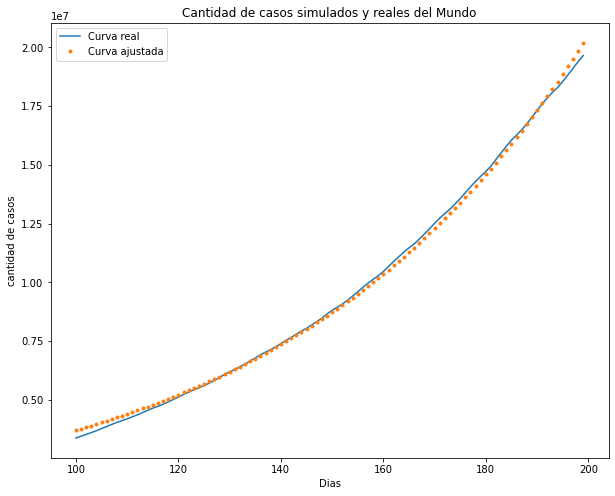

In [16]:
# Comparo los datos reales con los datos ajustados

k_world = popt[0]
t0 = popt[1]
casos_simu = exponencial(dias_principio, k_world, t0)


plt.figure(figsize = (10,8))
plt.plot(dias_principio,casos_principio,label='Curva real')
plt.plot(dias_principio,casos_simu,'.',label='Curva ajustada')
plt.legend()
plt.xlabel('Dias')
plt.ylabel('cantidad de casos')
plt.title('Cantidad de casos simulados y reales del Mundo')

In [17]:
k_world

0.017126404714268968

Veo que el K correspondiente a los casos mundiales es de 0.017

In [18]:
def casos_nuevos(casos):
  nuevos=np.zeros(len(casos))
  i=0
  while i<len(nuevos)-1:
    nuevos[i]=casos[i+1]-casos[i]
    i=i+1
  return nuevos   

**Función** que me permite estimar casos nuevos

Text(0.5, 1.0, 'Casos nuevos mundial')

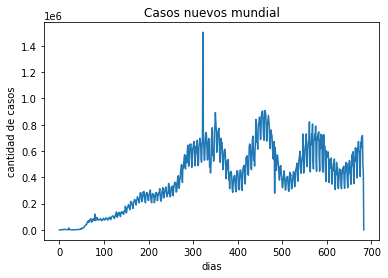

In [19]:
casos_mundiales = np.array(casos_world)
nuevos_mundo = casos_nuevos(casos_mundiales)
plt.plot(nuevos_mundo)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')
plt.title('Casos nuevos mundial')

### AHORA PROCEDO A REALIZAR EL MISMO ANÁLISIS PARA UN PAÍS EN PARTICULAR: ARGENTINA

Text(0.5, 1.0, 'Cantidad de casos Argentina')

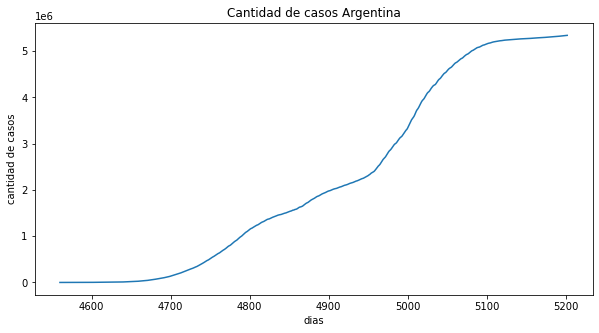

In [20]:
ind_arg=np.where(paises=='Argentina')
ind_arg=ind_arg[0]
casos_arg=confirmados[ind_arg]
dias=np.arange(0,len(casos_arg))

plt.figure(figsize = (10,5))
plt.plot(ind_arg,casos_arg)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')
plt.title('Cantidad de casos Argentina')

Esta es la curva de **casos totales** de la Argentina. Aquí no se ven las olas, ya que estas se ven en la curva de casos confirmados por día, es decir, de casos nuevos. Esta habla de los acumulados, entonces siempre se agregan.

Para ver mejor la curva, podemos tomar el logartimo de los datos. Una curva exponencial se ve lineal en escala logarítmica


Text(0, 0.5, 'log cantidad de casos')

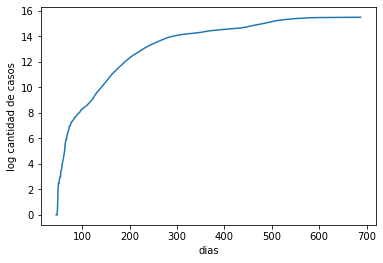

In [21]:
plt.plot(dias,np.log(casos_arg))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')

Veamos lo que pasa, al igual que antes, entre los días 100 y 200

Text(0, 0.5, 'cantidad de casos')

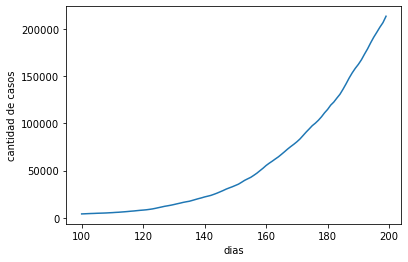

In [22]:
casos_principio_arg=casos_arg[100:200]
dias_principio_arg=dias[100:200]

plt.plot(dias_principio_arg,casos_principio_arg)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

Es difícil determinar si esta parte es exponencial. Analicemos qué pasa en escala logarítmica.

Text(0.5, 1.0, 'Logaritmo de la curva Argentina')

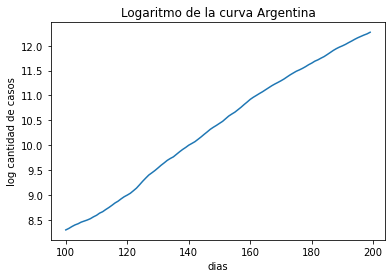

In [23]:
plt.plot(dias_principio_arg,np.log(casos_principio_arg))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')
plt.title('Logaritmo de la curva Argentina')

Confirmo nuevamente, al observar una recta, que estoy en el área de crecimiento exponencial

In [24]:
#ajustamos
popt, pcov = curve_fit(exponencial, dias_principio_arg, casos_principio_arg, maxfev = 2000)
popt

array([ 3.68498322e-02, -1.35317709e+02])

Veamos cómo se ajusta lo que obtuvimos a los datos reales

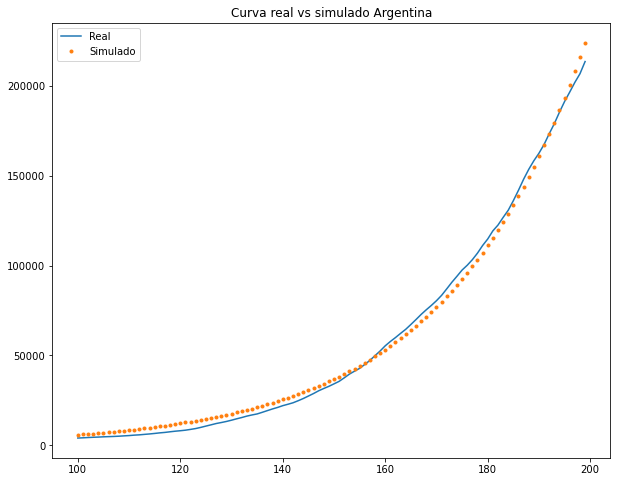

In [25]:
k_arg=popt[0]
t0=popt[1]

plt.figure(figsize=(10,8))
casos_simu=exponencial(dias_principio_arg,k_arg,t0)
plt.plot(dias_principio_arg,casos_principio_arg,label='Real')
plt.plot(dias_principio_arg,casos_simu,'.',label='Simulado')
plt.title('Curva real vs simulado Argentina')

plt.legend()

In [26]:
k_arg

0.03684983221348021

Observo que **el K para este Argentina particularmente es de 0.036, a comparación del K mundial que fue de 0.017**

Estimo casos nuevos a partir de la funcion creada anteriormente : **casos_nuevos**

Text(0.5, 1.0, 'Casos nuevos Argentina')

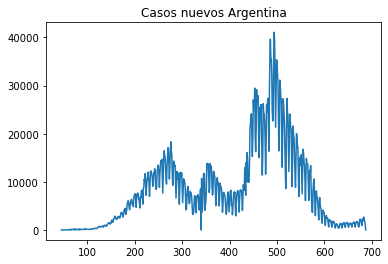

In [27]:
casos_arg=np.array(casos_arg)
nuevos_arg=casos_nuevos(casos_arg)
plt.plot(nuevos_arg)
plt.title('Casos nuevos Argentina')

### REALIZO EL MISMO ANÁLISIS CON CHINA: ORIGEN DE LA PANDEMIA

Text(0.5, 1.0, 'Cantidad de casos China')

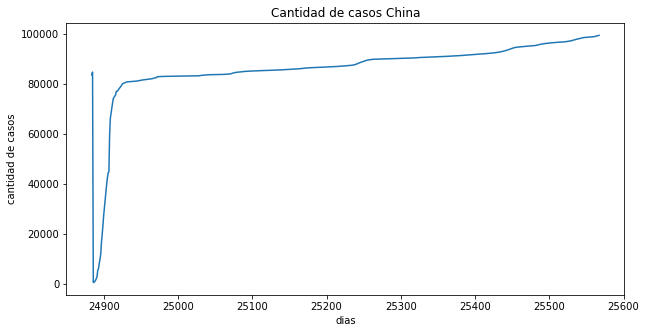

In [28]:
ind_ch=np.where(paises=='China')
ind_ch=ind_ch[0]
casos_ch=confirmados[ind_ch]
dias=np.arange(0,len(casos_ch))

plt.figure(figsize = (10,5))
plt.plot(ind_ch,casos_ch)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')
plt.title('Cantidad de casos China')

Text(0, 0.5, 'log cantidad de casos China')

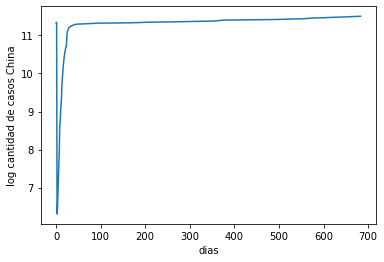

In [29]:
plt.plot(dias,np.log(casos_ch))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos China')

Text(0, 0.5, 'cantidad de casos China')

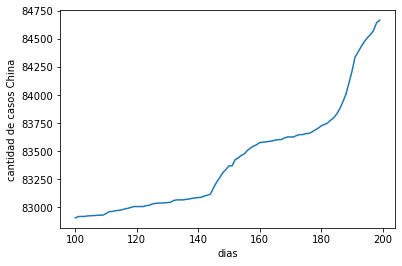

In [30]:
casos_principio_ch=casos_ch[100:200]
dias_principio_ch=dias[100:200]

plt.plot(dias_principio_ch,casos_principio_ch)
plt.xlabel('dias')
plt.ylabel('cantidad de casos China')

Text(0.5, 1.0, 'Logaritmo de la curva China')

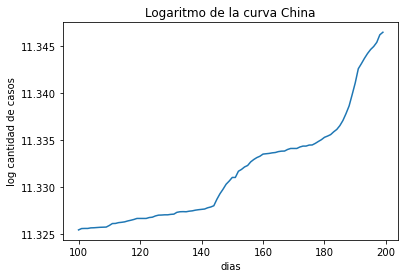

In [31]:
plt.plot(dias_principio_ch,np.log(casos_principio_ch))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')
plt.title('Logaritmo de la curva China')

In [32]:
popt, pcov = curve_fit(exponencial, dias_principio_ch, casos_principio_ch, maxfev = 20000)
popt

array([ 1.83127987e-04, -6.17288833e+04])

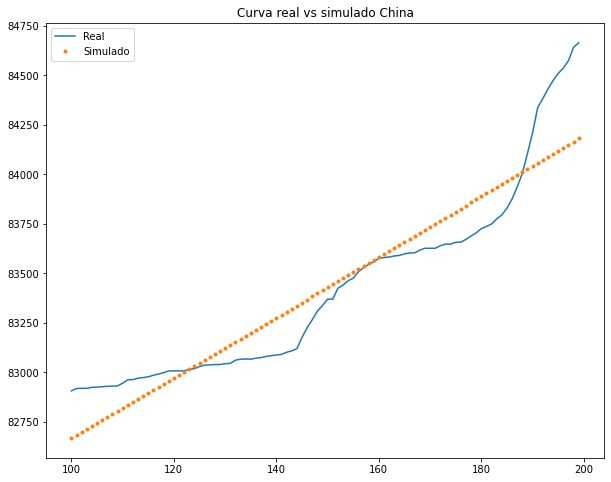

In [33]:
k_ch=popt[0]
t0=popt[1]

plt.figure(figsize=(10,8))
casos_simu_ch=exponencial(dias_principio_ch,k_ch,t0)
plt.plot(dias_principio_ch,casos_principio_ch,label='Real')
plt.plot(dias_principio_ch,casos_simu_ch,'.',label='Simulado')
plt.title('Curva real vs simulado China')
plt.legend()

In [34]:
k_ch

0.00018312798716166317

Puedo observar entonces los diferentes k obtenidos : 

- K mundial: 0.017
- k Arg: 0.036
- K China: 0.00018

Sabiendo que el origen de la Panemia fue en China, y llegó mas tarde a Argentina. También se que China y Arentina hicieron Cuarentena, mientras que en el K mundial se encuentran diversas políticas aplicadas (Vacunación + Cuarentena).
Esto puede significar que, como la pandemia comenzó en los países del norte y finalmente llegó a Argentina, distrubuyendose mas léntamente, el K de Argentina sea mas alto que el K mundial y el K de China. 
Esto es una posible hipotesis a partir de los datos observados.

A continuación voy a crear una función para poder realizar el gráfico de la curva de contagiados acumulada en diferentes países, para poder comparar entre ellos.

In [35]:
def casos_covid_pais(pais,inicio,fin):
    ind=np.where(paises==pais)
    ind=ind[0]
    casos=confirmados[ind]
    dias=np.arange(0,len(casos))
    casos_inicio = casos[inicio:fin]
    dias_inicio = dias[inicio:fin]
    
    plt.figure(figsize = (20,8))
    plt.subplot(2,4,1)
    plt.plot(dias,casos)
    plt.title(pais)
    plt.xlabel('Dias')
    plt.ylabel('Cantidad de casos')

    plt.subplot(2,4,2)
    plt.plot(dias,np.log(casos))
    plt.title(pais)
    plt.xlabel('Dias')
    plt.ylabel('Log cantidad de casos')

    plt.subplot(2,4,3)
    plt.plot(dias_inicio,casos_inicio)
    plt.title(pais)
    plt.xlabel('Dias seleccionados')
    plt.ylabel('Cantidad de casos')

    plt.subplot(2,4,4)
    plt.plot(dias_inicio,np.log(casos_inicio))
    plt.title(pais)
    plt.xlabel('Dias seleccionados')
    plt.ylabel('Log cantidad de casos')

Voy a elegir, además de Argentina y China (para comparar), 10 países más, los cuales hayan implementado políticas diferentes frente a la pandemia. Por ejemplo, Brasil y Estados Unidos no hicieron cuarentena y Argentina sí, en España hay mucha gente que optó por no vacunarse aunque el estado aceptó la vacunación, mientras que en Argentina la mayor parte de la población esta vacunada, y otros aspectos más que van a verse representados en el siguiente análisis, lo cual va a impactar directamente en el K obtenido por cada uno de ellos. 
Además intento elegir países alejados geográficamente entre sí, para tener en cuenta el factor distancia y velocidad de propagación del coronavirus.


In [36]:
paises_elegidos = ['Argentina', 'China', 'Spain','United States','Iran','Mexico', 'Brazil', 'Italy', 'Sweden', 'South Africa', 'Norway','Russia']

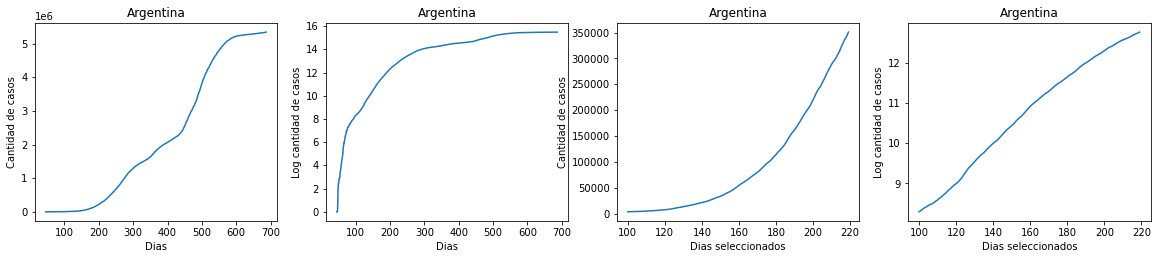

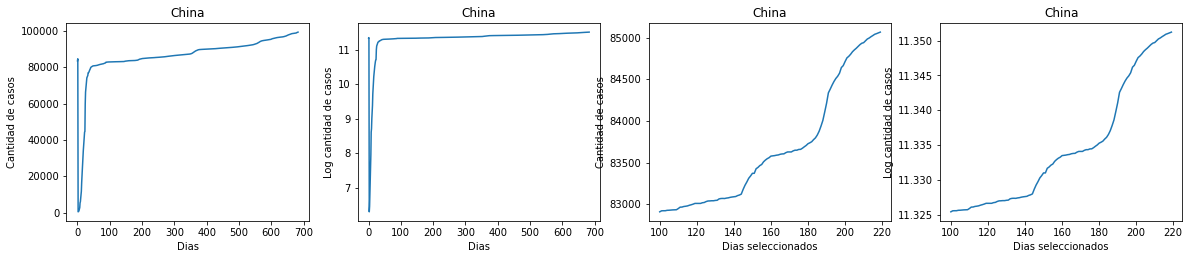

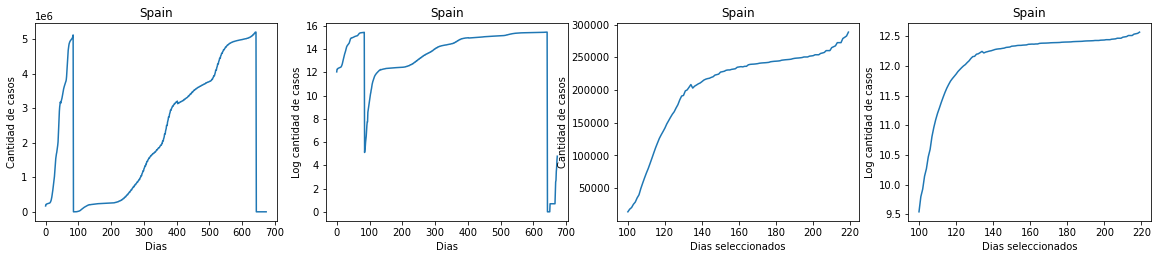

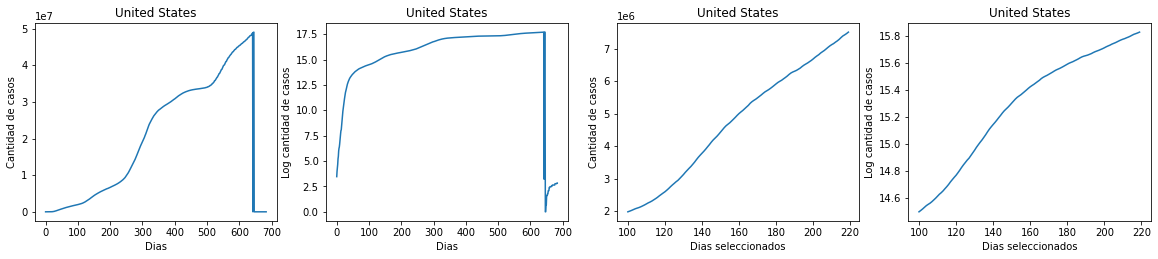

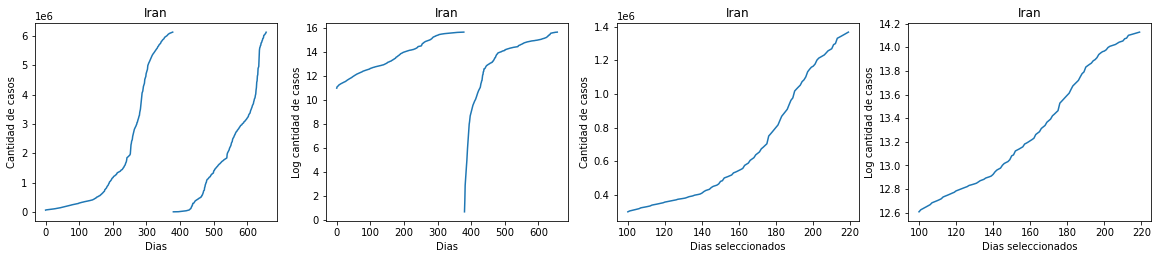

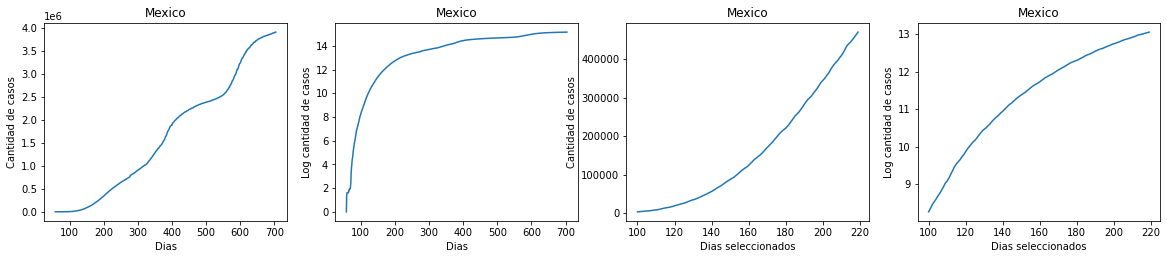

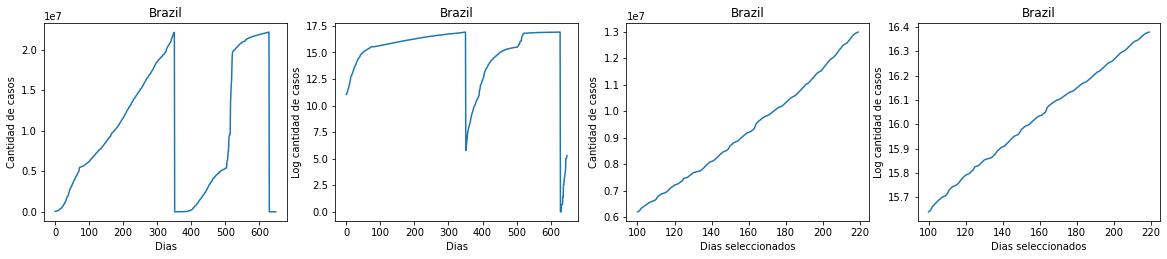

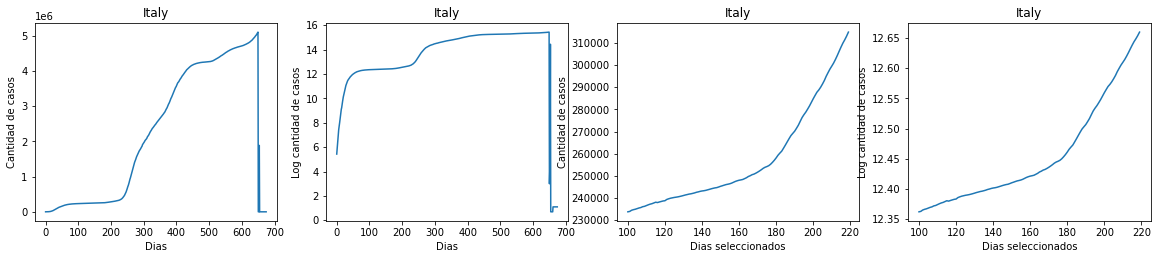

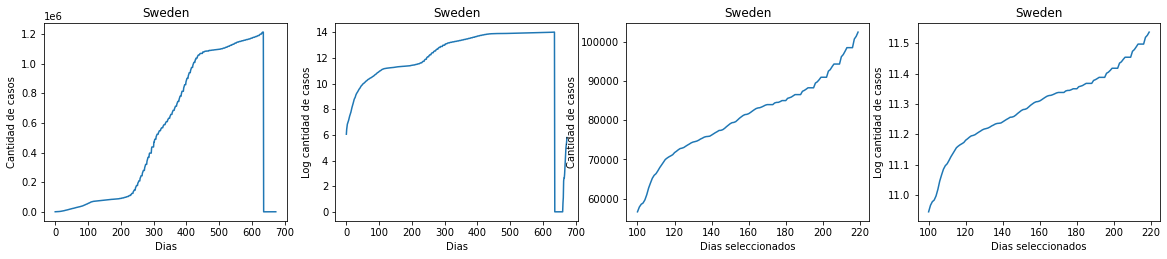

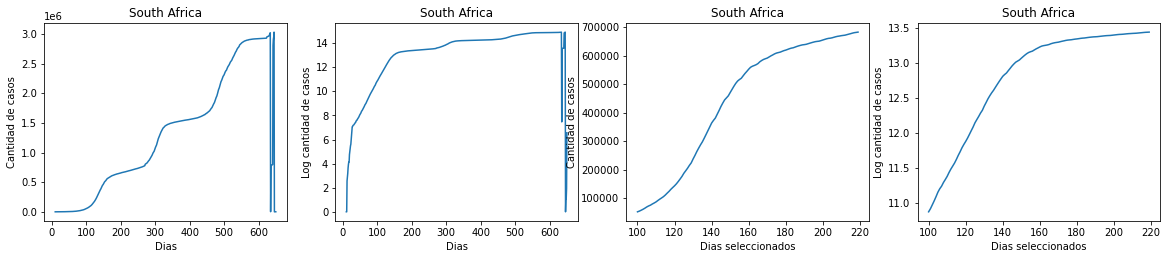

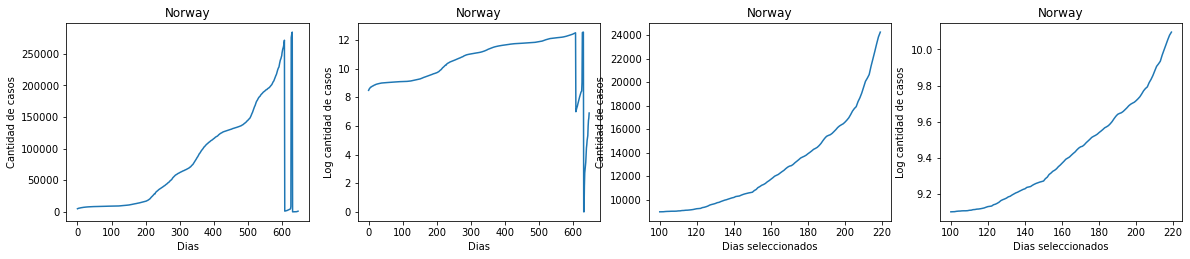

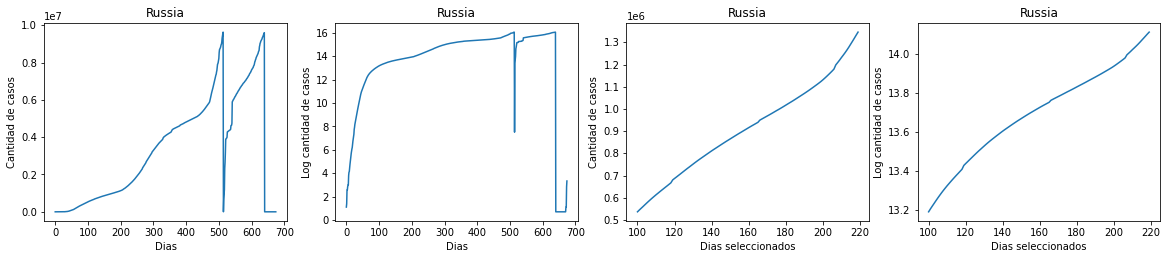

In [37]:
for i in paises_elegidos:
    casos_covid_pais(i,100,220) 

Puedo observar que, en el período elgido, poseen una curva de tipo exponencial los siguientes países: 
- Argentina 
- Iran
- Brazil
- Russia

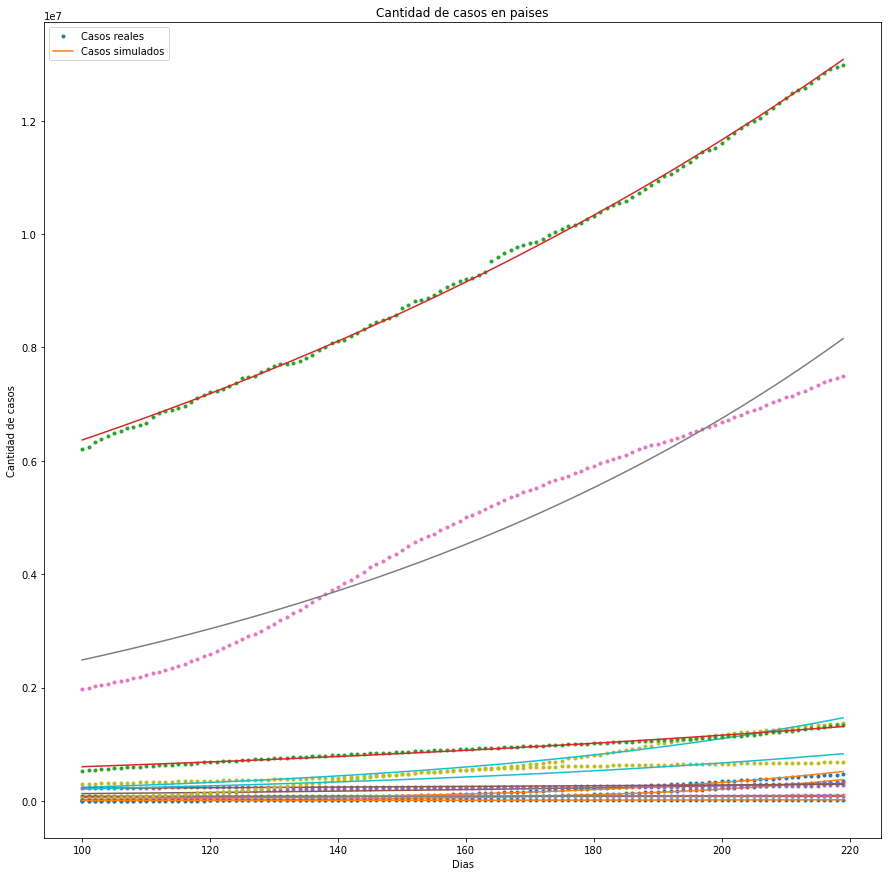

In [38]:
inicio = 100
fin = 220
k_paises=[]
plt.figure(figsize=(15,15))

for i in paises_elegidos:
    ind=np.where(paises==i)
    ind=ind[0]
    casos=confirmados[ind]
    dias=np.arange(0,len(casos))
    casos_principio = casos[inicio:fin]
    dias_principio = dias[inicio:fin]
    popt, pcov = curve_fit(exponencial, dias_principio, casos_principio, maxfev = 2000000) 
    
    k=popt[0]
    t0=popt[1]
    k_paises.append(k)
    casos_simu=exponencial(dias_principio,k,t0)
    
    plt.plot(dias_principio,casos_principio,'.')
    plt.plot(dias_principio,casos_simu,)
    plt.legend(['Casos reales', 'Casos simulados'])
    plt.legend(['Casos reales', 'Casos simulados'])
    plt.xlabel('Dias')
    plt.ylabel('Cantidad de casos')
    plt.title('Cantidad de casos en paises')

Grafico los K para tener una imagen más representativa:

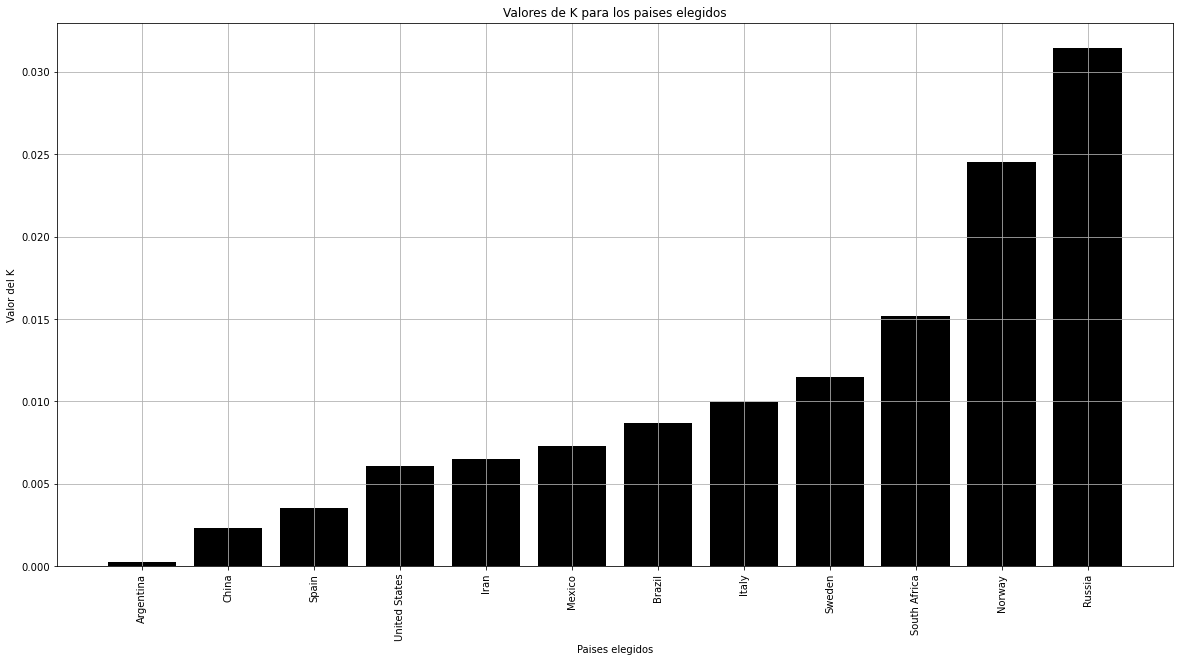

In [39]:
plt.figure(figsize=(20,10))
plt.bar(x=paises_elegidos, height=sorted(k_paises),color='black')
plt.xlabel('Paises elegidos')
plt.ylabel('Valor del K')
plt.title('Valores de K para los paises elegidos')
plt.xticks(rotation=90)
plt.grid()
plt.show()

Como ya tengo ahora los K para los diferentes países elegidos, puedo establecer ahora un **intervalo de confianza para K**

In [40]:
z = 1.96
n=len(k_paises)
media_muestral=np.mean(k_paises)
sigma_muestral=np.std(k_paises)
print('media de la muestra: ',media_muestral)
print('sigma de la muestra: ',sigma_muestral)

media de la muestra:  0.010603895217516444
sigma de la muestra:  0.008789536501282596


Calculo el **intervalo de confianza** 

In [41]:
intervalo =[media_muestral-z*sigma_muestral/np.sqrt(n),media_muestral+z*sigma_muestral/np.sqrt(n)]
print(intervalo)

[0.005630746777750247, 0.015577043657282642]


In [42]:
print('Diferencia entre limite superior e inferior del intervalo de confianza: ', intervalo[1]-intervalo[0])

Diferencia entre limite superior e inferior del intervalo de confianza:  0.009946296879532395


In [43]:
k_world 

0.017126404714268968

Puedo decir entonces aquí, con una **muestra de 12 países** elegidos, con un **nivel de confianza de un 95%** y suponiendo una distribución normal, que rechazo la hipotesis que afirma que el k_world obtenido es el valor del K poblacional, ya que este queda fuera del intervalo de confianza elegido. Esto puede ser debido a los **países elegidos** en la muestra, **probablemente su distribución geográfica este influyendo demasiado en el K**. 
Por lo tanto una buena opción sería agregar países de forma aleatoria a mi muestra y realizar nuevamente el mismo procedimiento.

 Procedo a agrandar la muestra para generar un nuevo intervalo de confianza: 

In [44]:
paises_nuevos = ['Argentina', 'China', 'Spain','United States','Iran','Mexico', 'Brazil', 'Italy', 'Sweden', 'South Africa', 'Norway','Russia',
                         'Africa' ,'Austria', 'Georgia','Germany','New Zealand','Nigeria','Paraguay','Netherlands','Serbia', 'Jamaica','Hong Kong' ,
                         'Japan' ,'Poland','Portugal','Vietnam','Ukraine','Panama','Belgium','Costa Rica','Bulgaria','Bolivia','Australia','Andorra',
                         'Algeria','Ethiopia','Hungary', 'Guatemala','Malaysia' ,'Maldives','Nepal','Mongolia','Kyrgyzstan','Kazakhstan','Madagascar']

C:\Users\gonzalo.gil\AppData\Local\Temp/ipykernel_16004/3495315007.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (20,8))


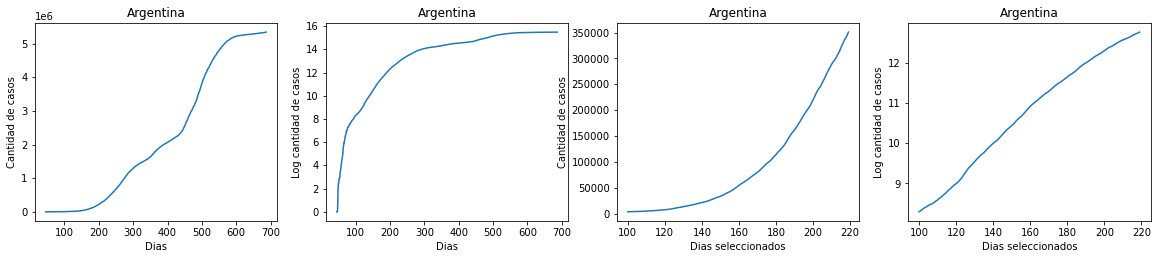

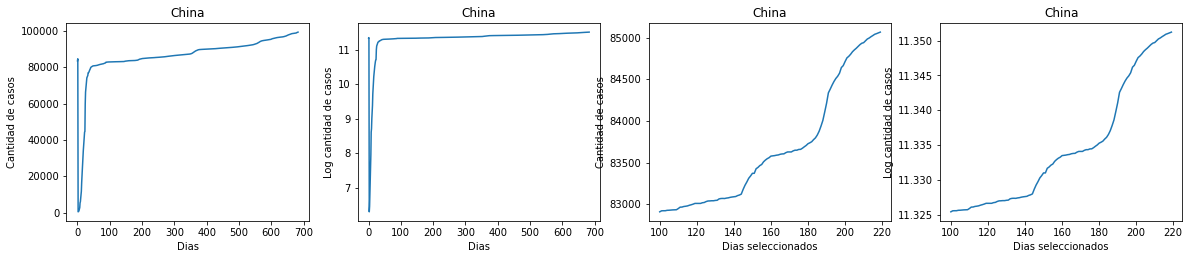

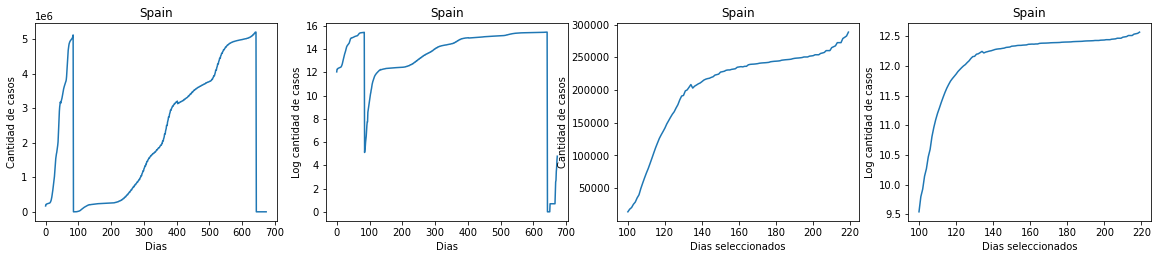

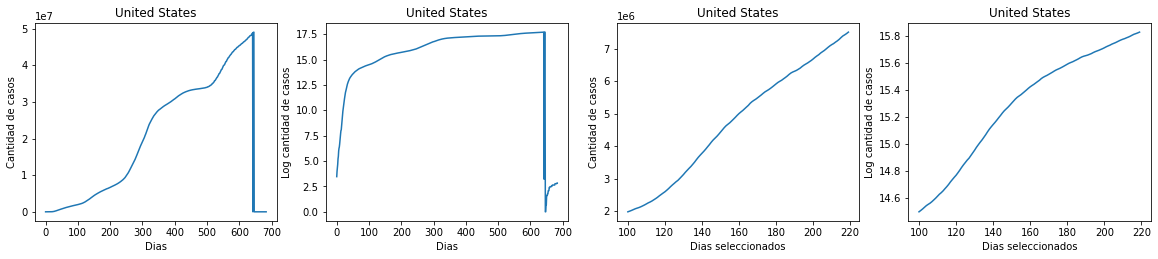

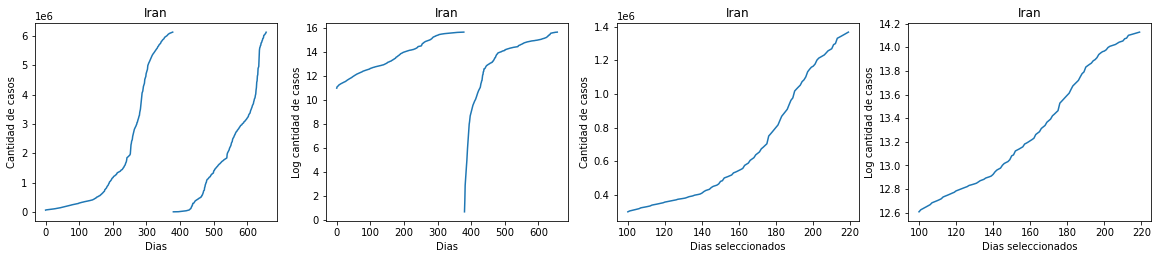

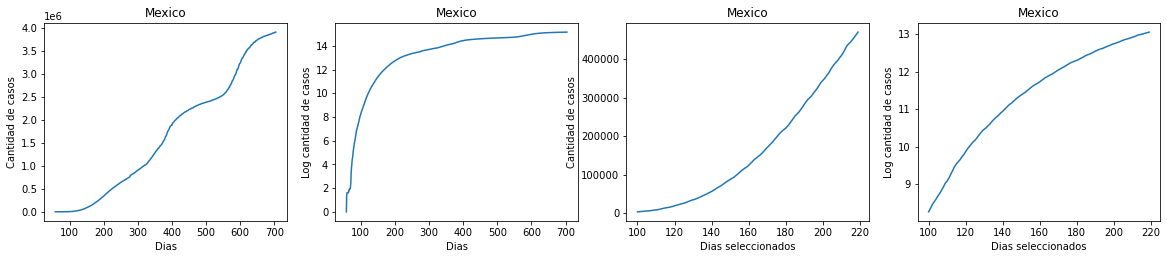

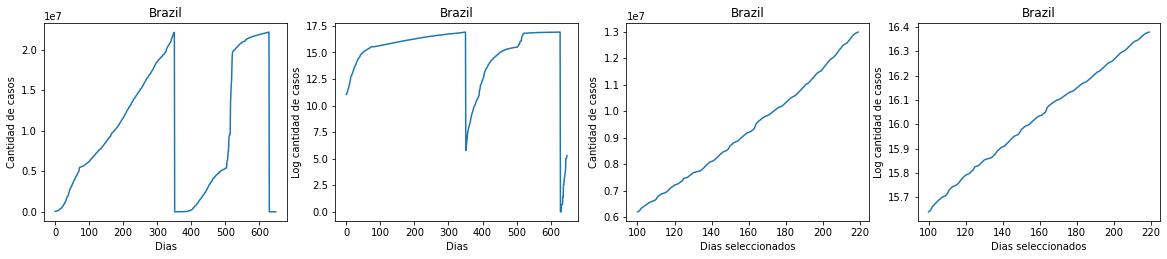

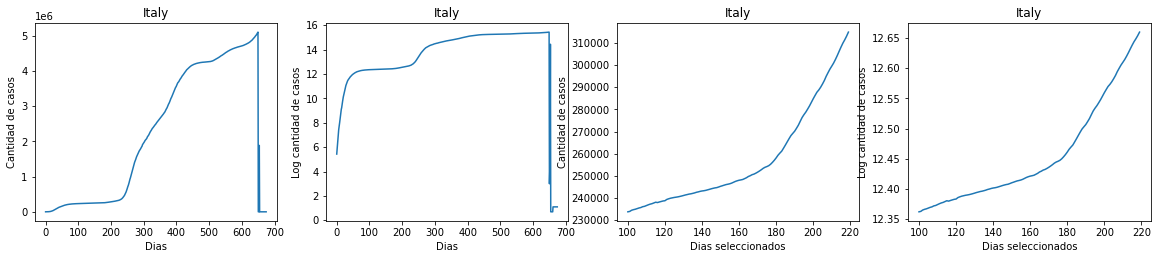

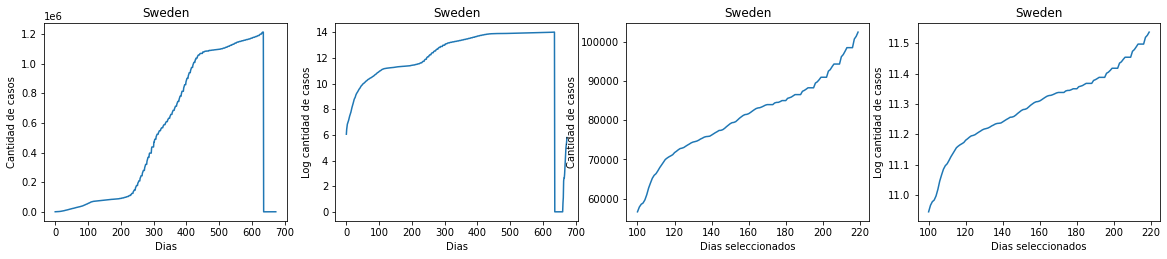

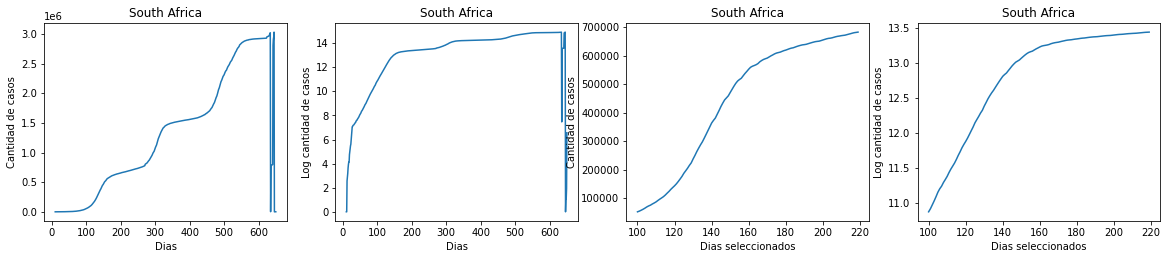

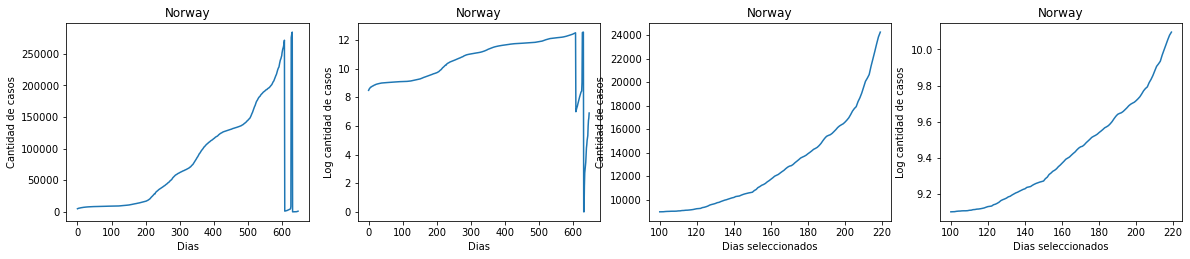

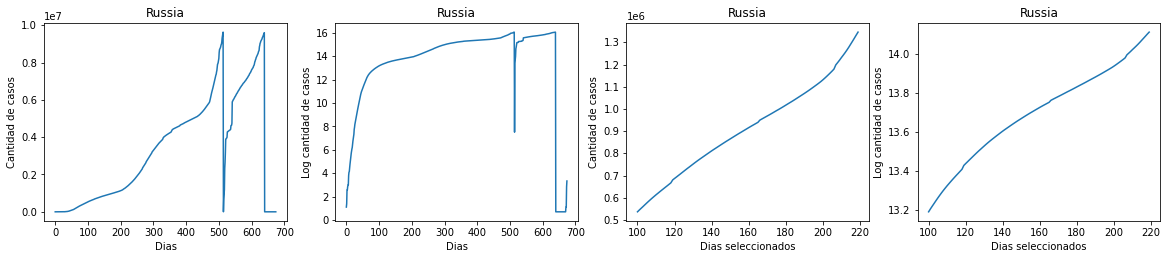

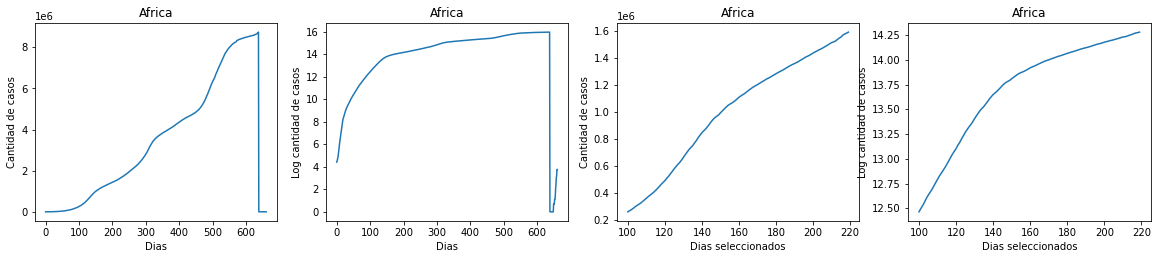

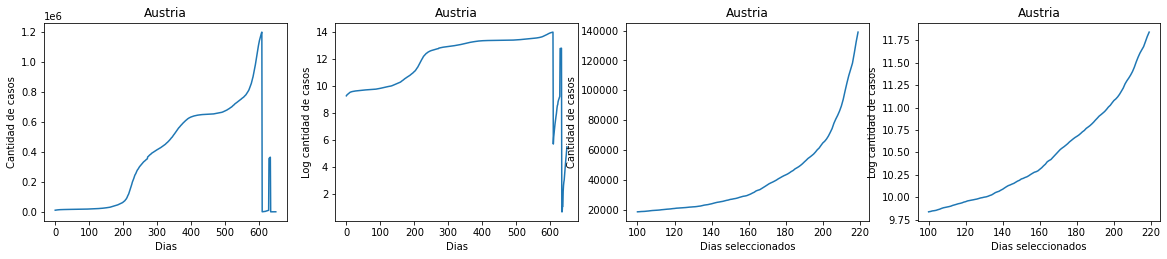

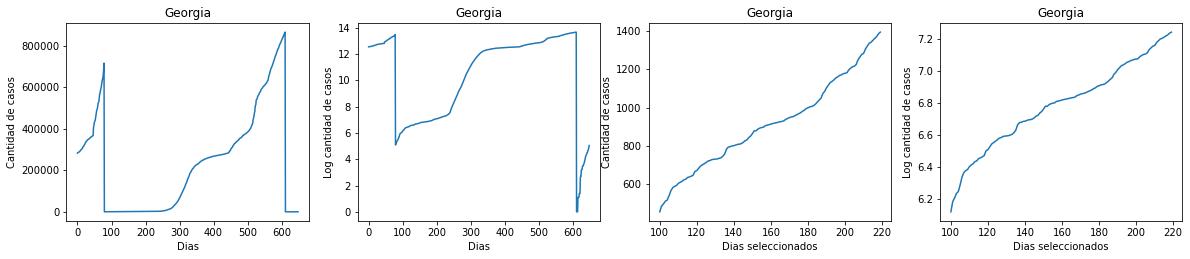

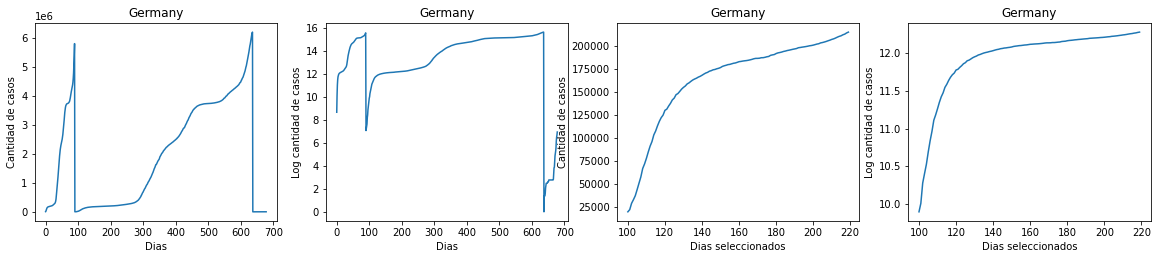

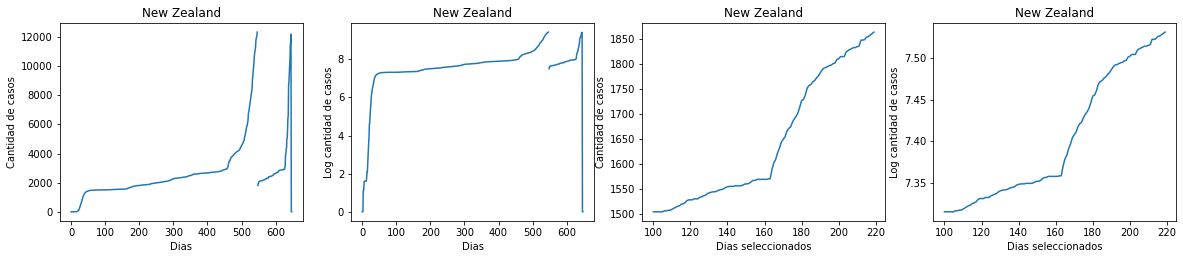

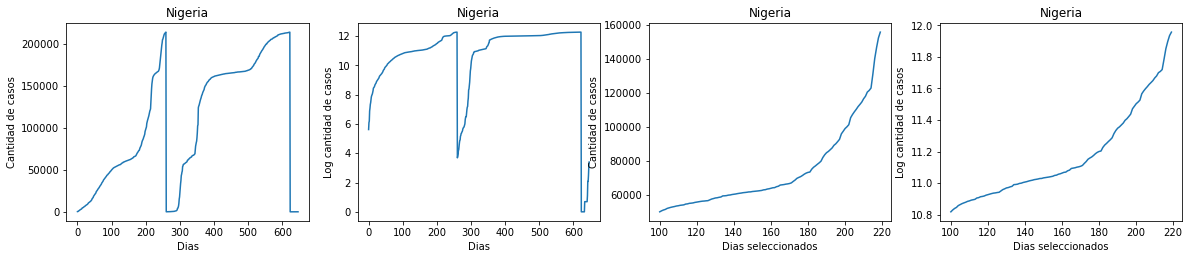

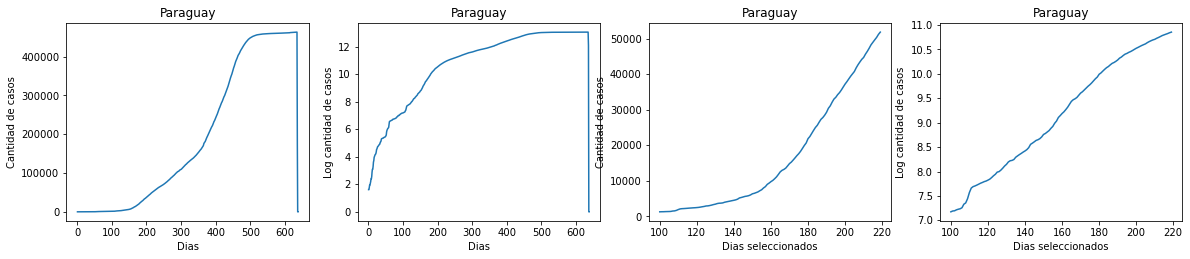

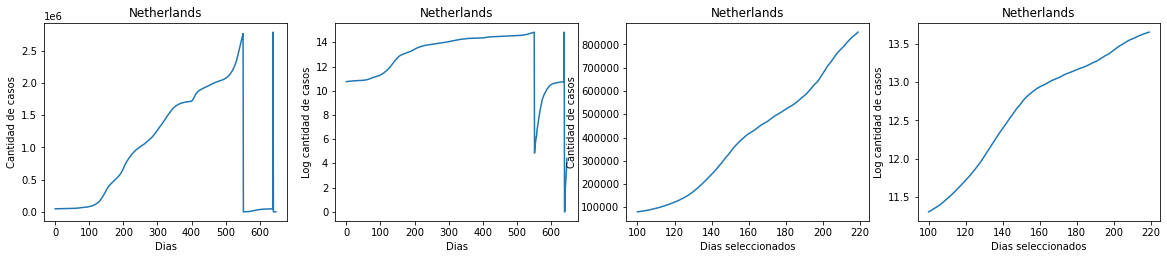

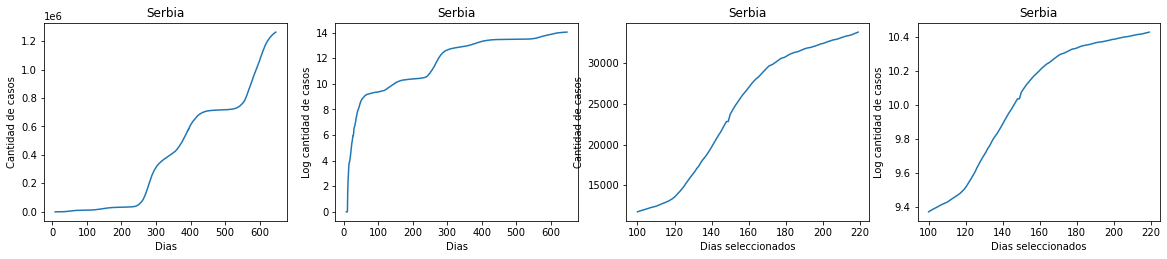

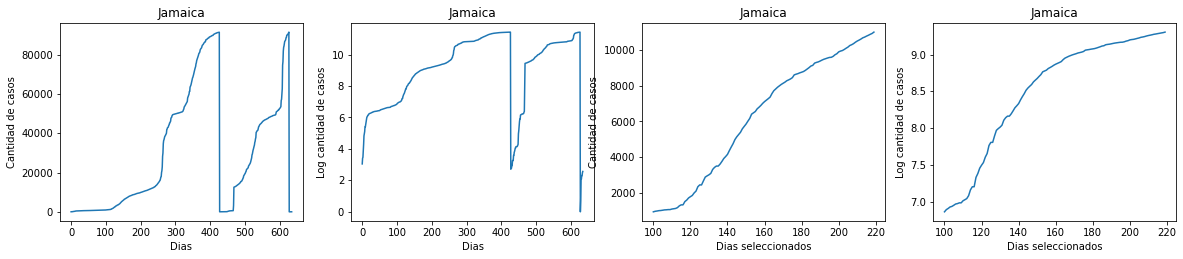

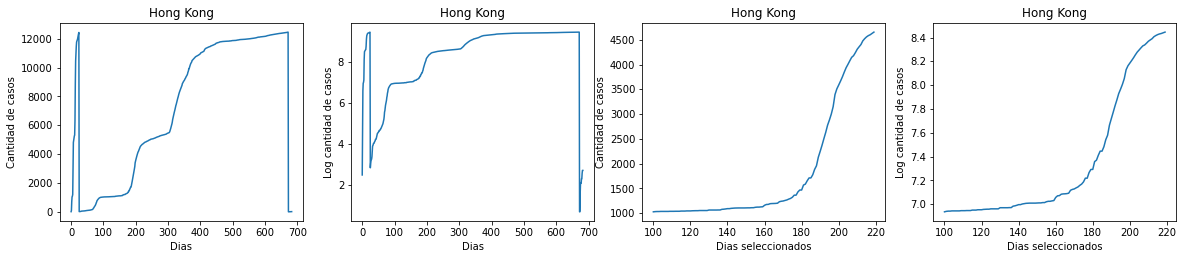

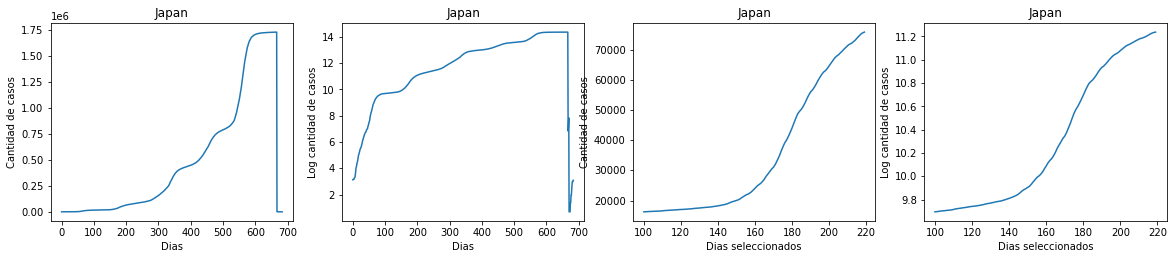

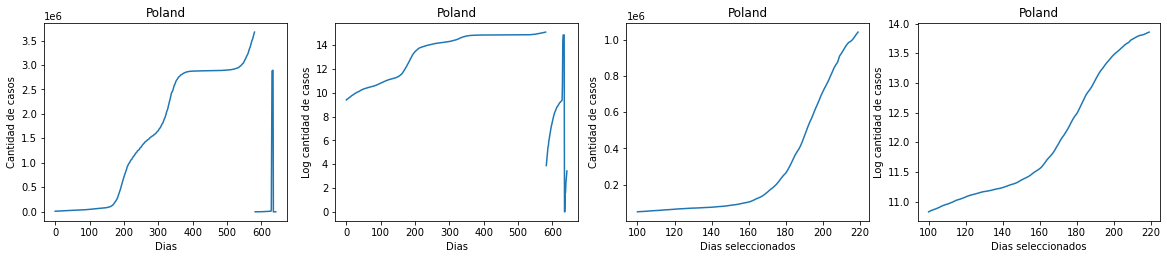

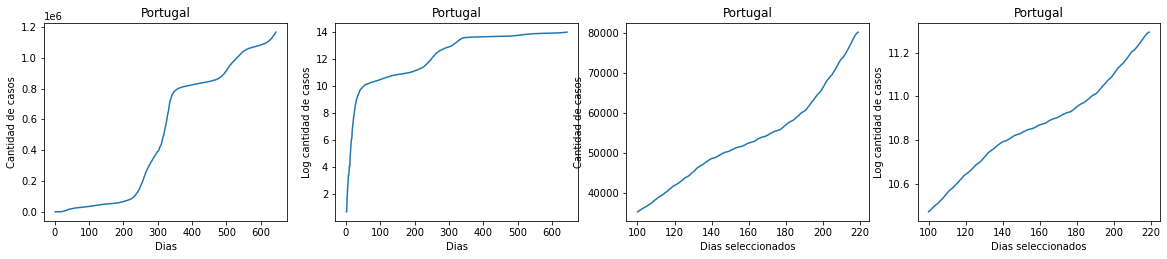

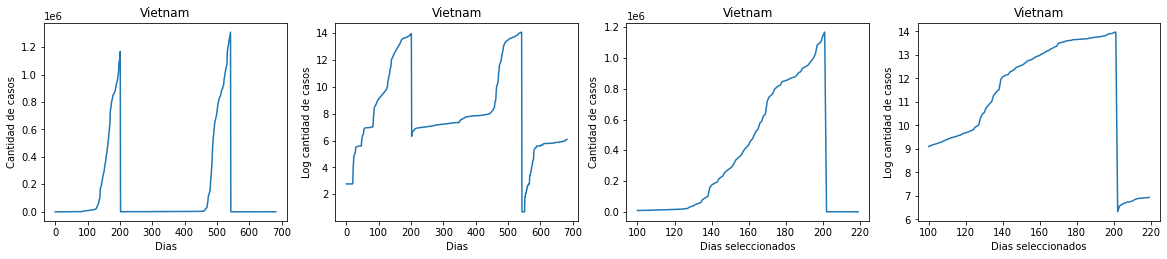

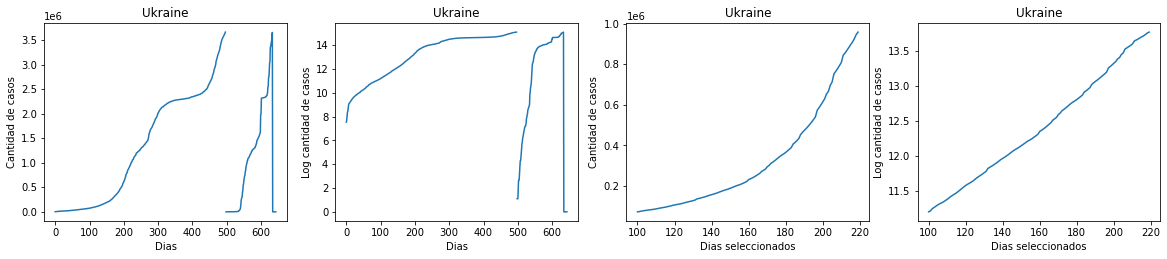

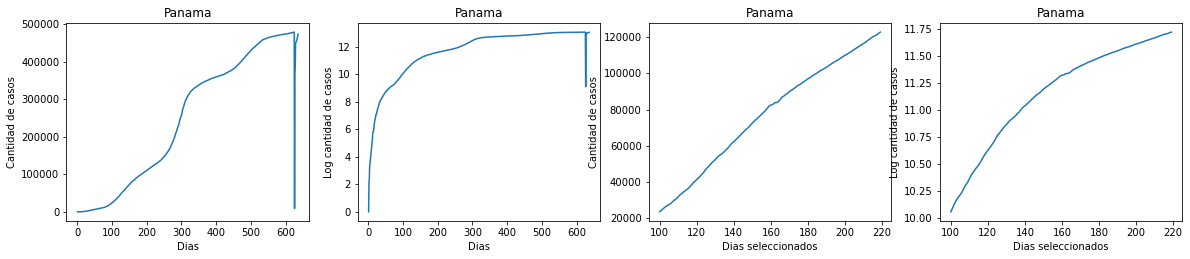

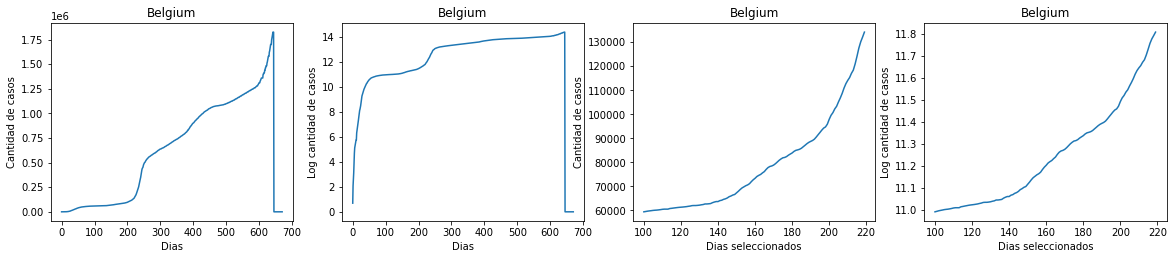

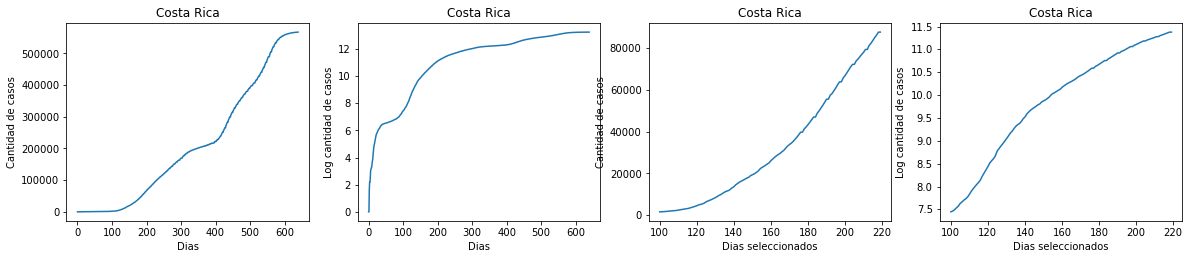

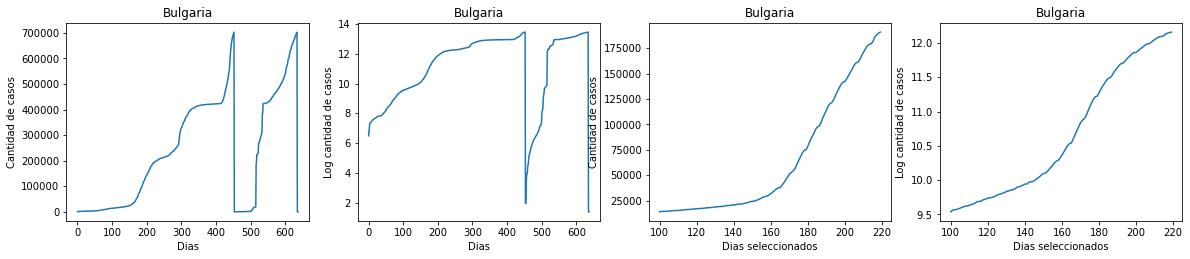

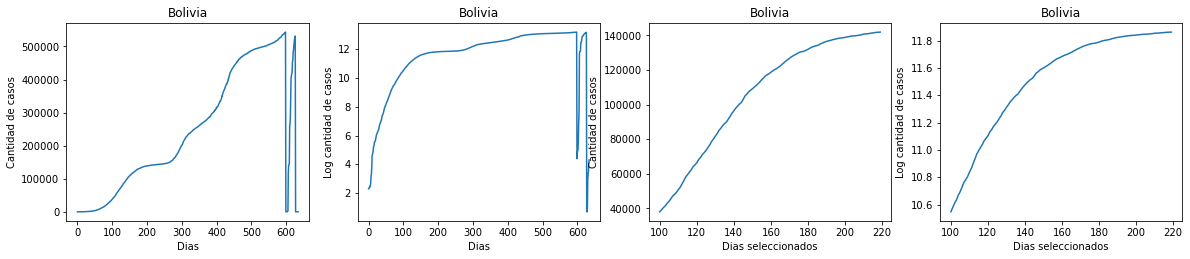

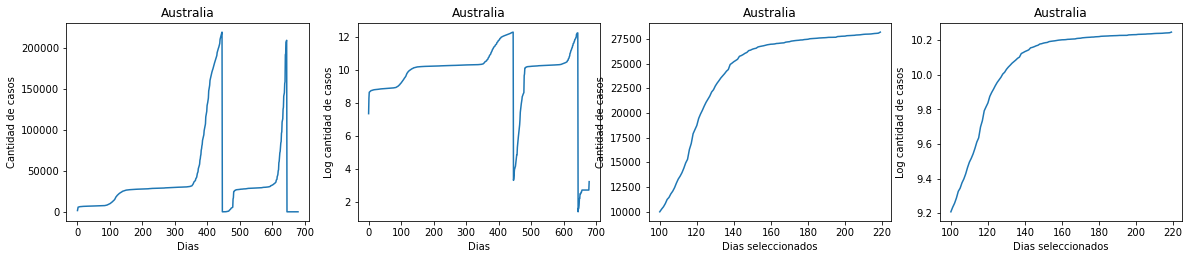

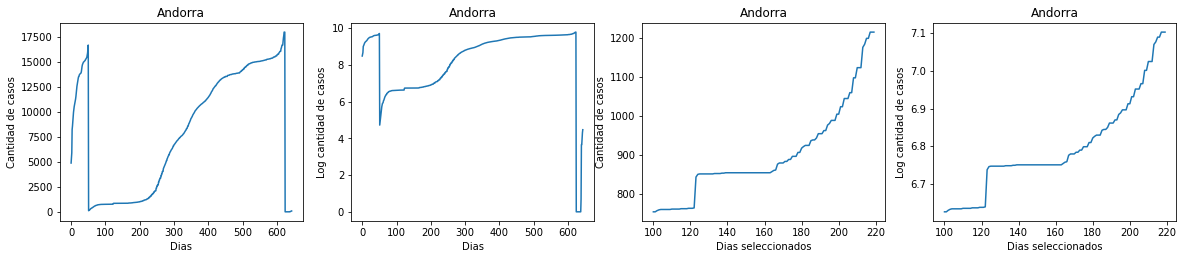

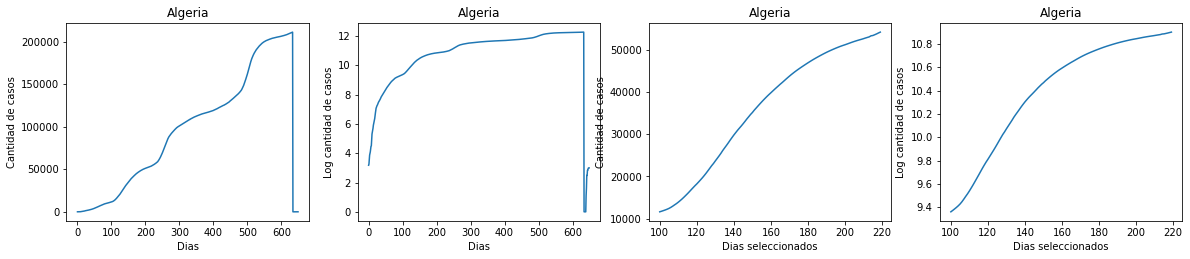

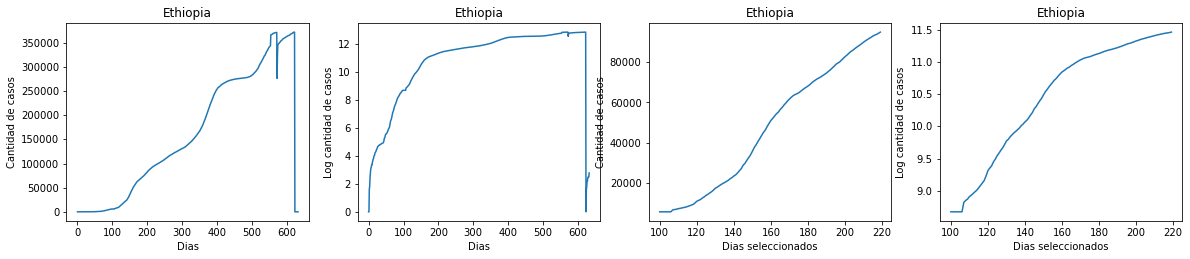

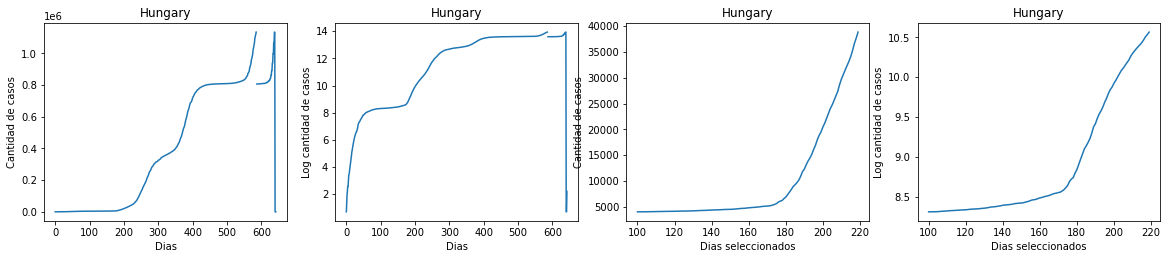

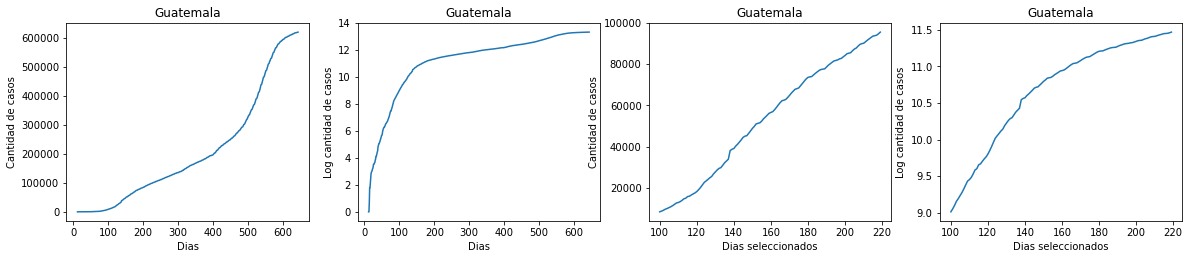

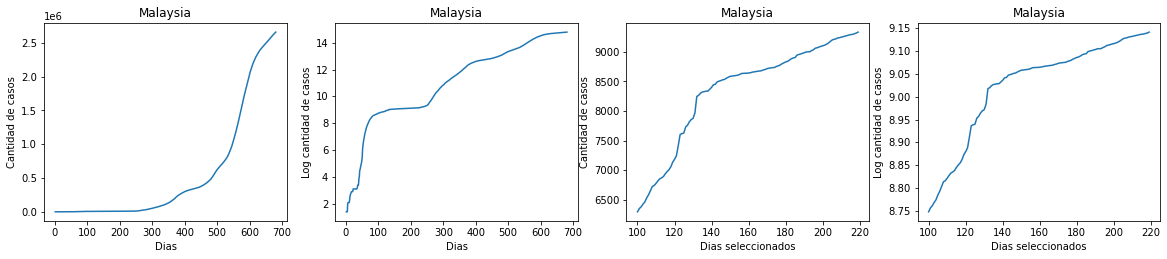

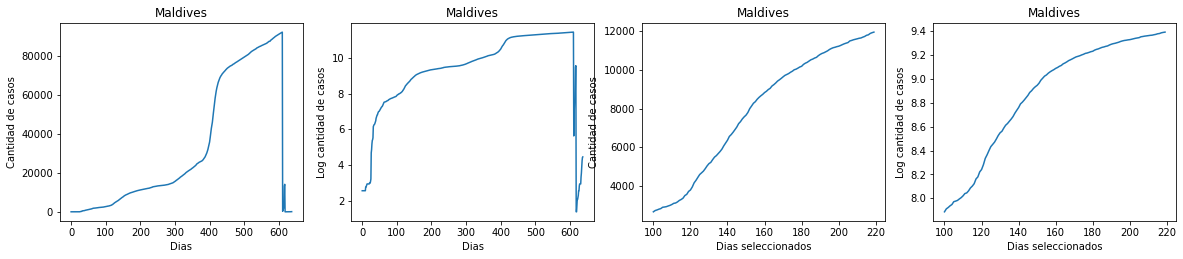

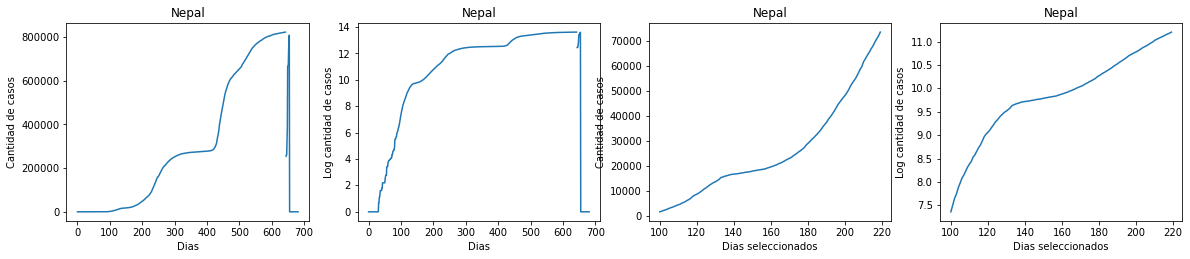

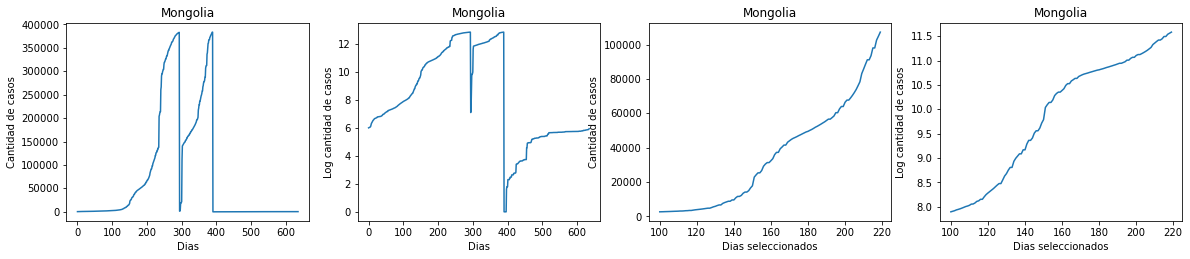

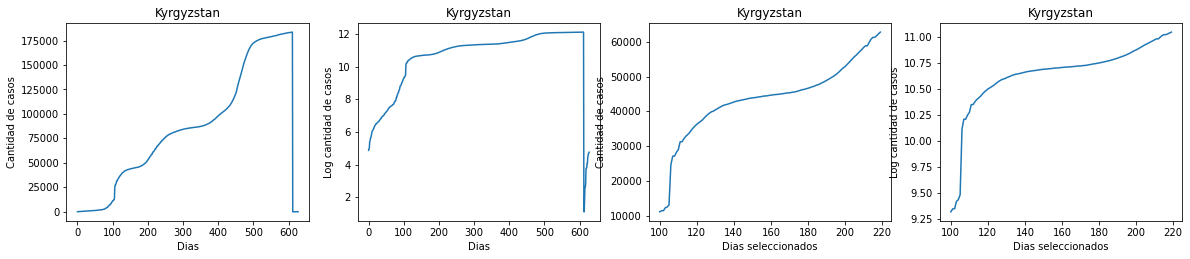

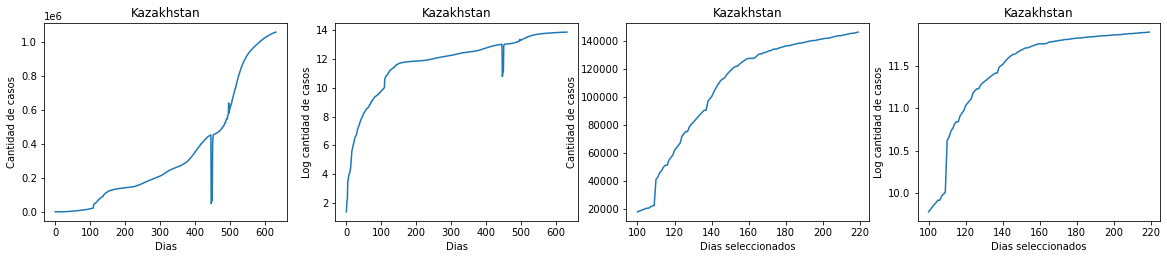

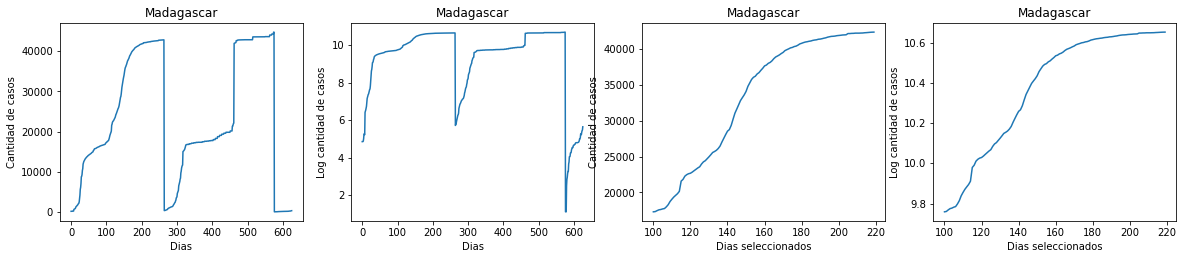

In [45]:
for i in paises_nuevos:
    casos_covid_pais(i,100,220) 

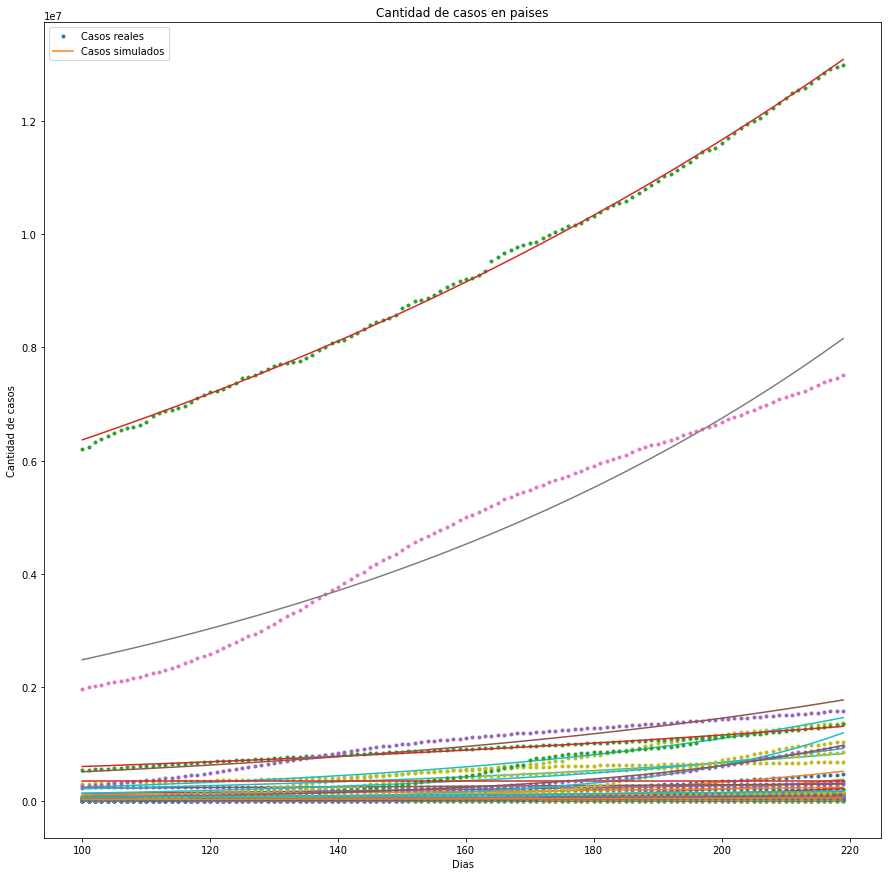

In [46]:
inicio = 100
fin = 220
k_paises_nuevos =[]
plt.figure(figsize=(15,15))

for i in paises_nuevos: 
    ind=np.where(paises==i)
    ind=ind[0]
    casos=confirmados[ind]
    dias=np.arange(0,len(casos))
    casos_principio = casos[inicio:fin]
    dias_principio = dias[inicio:fin]
    popt, pcov = curve_fit(exponencial, dias_principio, casos_principio, maxfev = 2000000) 
    
    k=popt[0]
    t0=popt[1]
    k_paises_nuevos.append(k)
    casos_simu=exponencial(dias_principio,k,t0)
    
    plt.plot(dias_principio,casos_principio,'.')
    plt.plot(dias_principio,casos_simu)
    plt.legend(['Casos reales', 'Casos simulados'])
    plt.legend(['Casos reales', 'Casos simulados'])
    plt.xlabel('Dias')
    plt.ylabel('Cantidad de casos')
    plt.title('Cantidad de casos en paises')

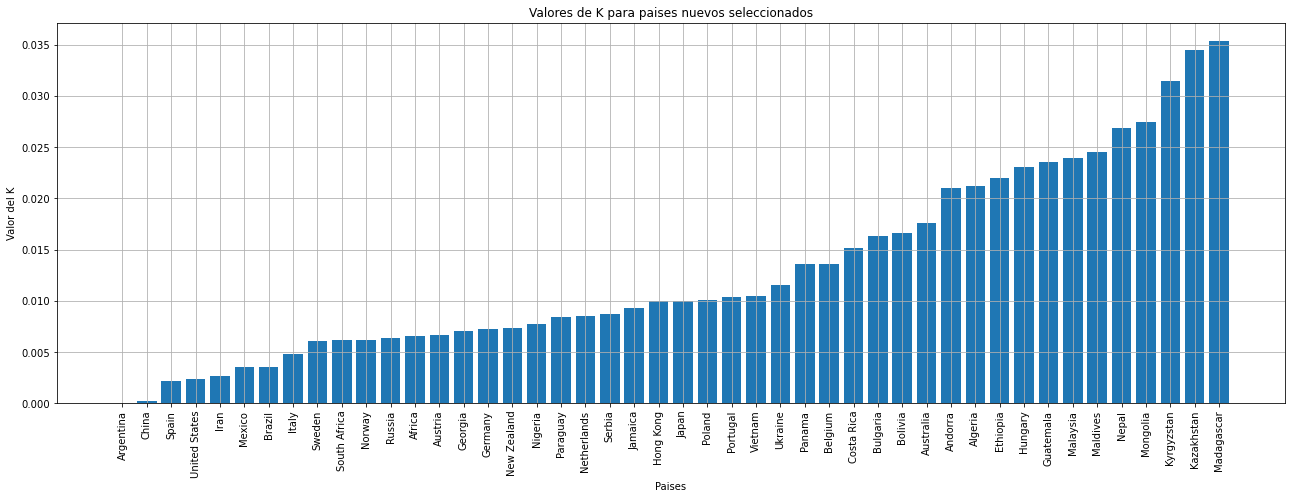

In [47]:
plt.figure(figsize=(22,7))
plt.bar(x=paises_nuevos, height=sorted(k_paises_nuevos))
plt.xlabel('Paises')
plt.ylabel('Valor del K')
plt.title('Valores de K para paises nuevos seleccionados')
plt.xticks(rotation=90)
plt.grid()
plt.show()

Calculo el nuevo **intervalo de confianza**

In [48]:
z = 1.96
n=len(k_paises_nuevos)
new_media_muestral=np.mean(k_paises_nuevos)
new_sigma_muestral=np.std(k_paises_nuevos)
print('media de la muestra: ',new_media_muestral)
print('sigma de la muestra: ',new_sigma_muestral)

media de la muestra:  0.01286548444727449
sigma de la muestra:  0.009160547821214825


In [49]:
nuevo_intervalo =[new_media_muestral-z*new_sigma_muestral/np.sqrt(n),new_media_muestral+z*new_sigma_muestral/np.sqrt(n)]
print(nuevo_intervalo)

[0.010218212230462115, 0.015512756664086864]


In [50]:
print('Diferencia entre limite superior e inferior del intervalo de confianza: ', nuevo_intervalo[1]-nuevo_intervalo[0])

Diferencia entre limite superior e inferior del intervalo de confianza:  0.005294544433624749


In [51]:
k_world

0.017126404714268968

Luego de haber agrandado la muestra seleccionando países aleatoriamente, puedo afirmar nuevamente, **con un nivel de confianza del 95%**, que **el K mundial no es un buen estimador de el K poblacional**. 
Descartando que sea por la elección de los países elegidos en la segunda muestra de forma aleatoria, esto quizás puede darse debido a que **la distribución de la población, no sea una distribución normal como lo hemos supuesto anteriormente**.

Finalmente pude observar que : 
- Al agregar mas tamaño a mi muestra --> El intervalo de confianza se hizo más chico.
- Mi primer muestra de menor tamaño --> Dió el mismo resultado que al agregar más países --> Por lo tanto fue una buena estimación.


 
 # SEGUNDA PARTE:  Evaluando estrategias

 Ahora que tienes una manera de obtener información de las curvas, puedes intentar evaluar las estrategias de acción y el comportamiento de las poblaciones, construyendo un clasificador binario. 
1. Elige una categoría binaria que hable de políticas públicas elegidas por los países para enfrentar la pandemia que te interese estudiar, como pueden ser "la población hizo cuarententa" o "la población se vacunó".
2. Piensa qué indicadores de la curva pueden hablar del éxito de la política que quieres estudiar. Por ejemplo, si se tratase de evaluar el éxito de una cuarentena podría ser porcentaje de población  que se contagió o variación del valor de $k$ a partir de que se empezó a implementar esa medida. Elige al menos 3 indicadores.
3. Investiga sobre países que hayan aplicado o no esa política pública, para generar una base de datos. Por ejemplo, Brasil no hizo cuarentena y China hizo una muy estricta. Recuerda hacer una selección inteligente de la porción de datos de la curva de cada país que vas a analizar.
4. Construye un clasificador binario a partir de una regresión logística o usando Naive Bayes para intentar analizar la estrategia de otros países y ver si es posible predecirla a partir de la curva de contagios y el clasificador. Un posible clasificador binario es uno que clasifique el porcentaje de contagios en función da las categorías "la población hizo cuarentena" y "la población n hizo cuarentena". Haz esto para los 3 indicadores que elegiste en el punto 3 y compara los resultados.
5. Elabora un informe con lo que hayas aprendido a lo largo de este proyecto, donde discutas la utilidad o no de los indicadores que elegiste y del análisis estadístico propuesto.


Cargamos el dataset que incluye las **políticas tomadas**

In [52]:
data = pd.read_csv(r"C:\Users\gonzalo.gil\Desktop\Gonza\DS Acamica\Datasets\covid-tests-cases-deaths.csv")
data.head(10)

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19
0,Afghanistan,AFG,2020-03-23,NaN,NaN,1.0,40.0
1,Afghanistan,AFG,2020-03-24,NaN,NaN,1.0,42.0
2,Afghanistan,AFG,2020-03-25,NaN,NaN,1.0,74.0
3,Afghanistan,AFG,2020-03-26,NaN,NaN,2.0,80.0
4,Afghanistan,AFG,2020-03-27,NaN,NaN,2.0,91.0
5,Afghanistan,AFG,2020-03-28,NaN,NaN,2.0,106.0
6,Afghanistan,AFG,2020-03-29,NaN,NaN,4.0,114.0
7,Afghanistan,AFG,2020-03-30,NaN,NaN,4.0,114.0
8,Afghanistan,AFG,2020-03-31,NaN,NaN,4.0,166.0
9,Afghanistan,AFG,2020-04-01,NaN,NaN,4.0,192.0


In [53]:
data.isnull().sum()

Entity                                        0
Code                                      12532
Day                                           0
total_tests                               75368
142601-annotations                        77144
Total confirmed deaths due to COVID-19    13363
Total confirmed cases of COVID-19          1840
dtype: int64

In [54]:
data.describe()

,total_tests,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19
count,5.975600e+04,1.217610e+05,1.332840e+05
mean,1.295053e+07,9.087951e+04,3.780073e+06
std,5.208780e+07,4.456131e+05,2.031215e+07
min,0.000000e+00,1.000000e+00,1.000000e+00
25%,2.908815e+05,8.900000e+01,2.670000e+03
50%,1.482981e+06,8.500000e+02,3.209850e+04
75%,6.407540e+06,8.106000e+03,3.151182e+05
max,6.699385e+08,5.255859e+06,2.658641e+08


In [55]:
data = data.fillna(0.0009)

A pesar de que el **fillna** afecta a todas las variables, reemplazo por la media de confirmed deaths para que no afecte a esta variable que es de mi interés. 

In [56]:
data.isnull().sum()

Entity                                    0
Code                                      0
Day                                       0
total_tests                               0
142601-annotations                        0
Total confirmed deaths due to COVID-19    0
Total confirmed cases of COVID-19         0
dtype: int64

In [57]:
data.shape

(135124, 7)

Procedo a obtener una nueva columna, a partir de las existentes, que indique si hubo un aumento de la cantidad de muertes por día con un 1 , y que indique con un 0 cuando no se incrementaron las muertes por día.

In [58]:
first = True
for index, row in data.iterrows():
    if first:
        data.loc[index, "Muertesxdia"] = data.loc[index, "Total confirmed deaths due to COVID-19"]
        first = False
    else:
        data.loc[index, "Muertesxdia"] = data.loc[index, "Total confirmed deaths due to COVID-19"] - data.loc[index-1, "Total confirmed deaths due to COVID-19"]

data.head()

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19,Muertesxdia
0,Afghanistan,AFG,2020-03-23,0.0009,0.0009,1.0,40.0,1.0
1,Afghanistan,AFG,2020-03-24,0.0009,0.0009,1.0,42.0,0.0
2,Afghanistan,AFG,2020-03-25,0.0009,0.0009,1.0,74.0,0.0
3,Afghanistan,AFG,2020-03-26,0.0009,0.0009,2.0,80.0,1.0
4,Afghanistan,AFG,2020-03-27,0.0009,0.0009,2.0,91.0,0.0


In [59]:
first = True
for index, row in datos.iterrows():
    if first:
        data.loc[index, "Variación_muertes"] = data.loc[index, "Muertesxdia"]
        first = False
    else:
        data.loc[index, "Variación_muertes"] = data.loc[index, "Muertesxdia"] - data.loc[index-1, "Muertesxdia"]
        
data.head()

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19,Muertesxdia,Variación_muertes
0,Afghanistan,AFG,2020-03-23,0.0009,0.0009,1.0,40.0,1.0,1.0
1,Afghanistan,AFG,2020-03-24,0.0009,0.0009,1.0,42.0,0.0,-1.0
2,Afghanistan,AFG,2020-03-25,0.0009,0.0009,1.0,74.0,0.0,0.0
3,Afghanistan,AFG,2020-03-26,0.0009,0.0009,2.0,80.0,1.0,1.0
4,Afghanistan,AFG,2020-03-27,0.0009,0.0009,2.0,91.0,0.0,-1.0


In [60]:
for index, row in data.iterrows():
    if data.loc[index, "Variación_muertes"] > 0: 
        data.loc[index, "Variacion_muertes_Binaria"] = 0
    else:
        data.loc[index, "Variacion_muertes_Binaria"] = 1
        
data.head(10)

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19,Muertesxdia,Variación_muertes,Variacion_muertes_Binaria
0,Afghanistan,AFG,2020-03-23,0.0009,0.0009,1.0,40.0,1.0,1.0,0.0
1,Afghanistan,AFG,2020-03-24,0.0009,0.0009,1.0,42.0,0.0,-1.0,1.0
2,Afghanistan,AFG,2020-03-25,0.0009,0.0009,1.0,74.0,0.0,0.0,1.0
3,Afghanistan,AFG,2020-03-26,0.0009,0.0009,2.0,80.0,1.0,1.0,0.0
4,Afghanistan,AFG,2020-03-27,0.0009,0.0009,2.0,91.0,0.0,-1.0,1.0
5,Afghanistan,AFG,2020-03-28,0.0009,0.0009,2.0,106.0,0.0,0.0,1.0
6,Afghanistan,AFG,2020-03-29,0.0009,0.0009,4.0,114.0,2.0,2.0,0.0
7,Afghanistan,AFG,2020-03-30,0.0009,0.0009,4.0,114.0,0.0,-2.0,1.0
8,Afghanistan,AFG,2020-03-31,0.0009,0.0009,4.0,166.0,0.0,0.0,1.0
9,Afghanistan,AFG,2020-04-01,0.0009,0.0009,4.0,192.0,0.0,0.0,1.0


Procedo a cargar los **datasets que incluyen las políticas** que tomó cada país por día. 

In [61]:
cuarentena = pd.read_csv(r"C:\Users\gonzalo.gil\Desktop\Gonza\DS Acamica\Datasets\stay-at-home-covid.csv")
cuarentena.head(10)

,Entity,Code,Day,stay_home_requirements
0,Afghanistan,AFG,2020-01-01,0
1,Afghanistan,AFG,2020-01-02,0
2,Afghanistan,AFG,2020-01-03,0
3,Afghanistan,AFG,2020-01-04,0
4,Afghanistan,AFG,2020-01-05,0
5,Afghanistan,AFG,2020-01-06,0
6,Afghanistan,AFG,2020-01-07,0
7,Afghanistan,AFG,2020-01-08,0
8,Afghanistan,AFG,2020-01-09,0
9,Afghanistan,AFG,2020-01-10,0


In [64]:
cuarentena['stay_home_requirements'].unique()

array([0, 2, 3, 1], dtype=int64)

In [65]:
vacunacion = pd.read_csv(r"C:\Users\gonzalo.gil\Desktop\Gonza\DS Acamica\Datasets\covid-vaccination-policy.csv")
vacunacion.head(10)

,Entity,Code,Day,vaccination_policy
0,Afghanistan,AFG,2020-01-01,0
1,Afghanistan,AFG,2020-01-02,0
2,Afghanistan,AFG,2020-01-03,0
3,Afghanistan,AFG,2020-01-04,0
4,Afghanistan,AFG,2020-01-05,0
5,Afghanistan,AFG,2020-01-06,0
6,Afghanistan,AFG,2020-01-07,0
7,Afghanistan,AFG,2020-01-08,0
8,Afghanistan,AFG,2020-01-09,0
9,Afghanistan,AFG,2020-01-10,0


In [66]:
vacunacion['vaccination_policy'].unique()

array([0, 2, 1, 3, 4, 5], dtype=int64)

In [67]:
vuelos = pd.read_csv(r"C:\Users\gonzalo.gil\Desktop\Gonza\DS Acamica\Datasets\international-travel-covid.csv")
vuelos.head(10)

,Entity,Code,Day,international_travel_controls
0,Afghanistan,AFG,2020-01-01,0
1,Afghanistan,AFG,2020-01-02,0
2,Afghanistan,AFG,2020-01-03,0
3,Afghanistan,AFG,2020-01-04,0
4,Afghanistan,AFG,2020-01-05,0
5,Afghanistan,AFG,2020-01-06,0
6,Afghanistan,AFG,2020-01-07,0
7,Afghanistan,AFG,2020-01-08,0
8,Afghanistan,AFG,2020-01-09,0
9,Afghanistan,AFG,2020-01-10,0


In [68]:
vuelos['international_travel_controls'].unique()

array([0, 3, 1, 2, 4], dtype=int64)

Procedo a **preparar estos 3 datasets** para anexarlos a mi dataset principal.

Elimino Code ya que esta columna esta presente en mi dataset principal.

In [69]:
cuarentena = cuarentena.drop(columns = ['Code'])
vacunacion = vacunacion.drop(columns = ['Code'])
vuelos = vuelos.drop(columns = ['Code'])

**Anexo** mis datasets que indican políticas **a mi dataset principal**.

In [70]:
anexo1 = pd.merge(data, cuarentena, on=['Day','Entity'])
anexo2 = pd.merge(anexo1, vuelos, on=['Day','Entity'])
anexo3 = pd.merge(anexo2, vacunacion, on=['Day','Entity'])

data_final = anexo3
data_final.head(10)

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19,Muertesxdia,Variación_muertes,Variacion_muertes_Binaria,stay_home_requirements,international_travel_controls,vaccination_policy
0,Afghanistan,AFG,2020-03-23,0.0009,0.0009,1.0,40.0,1.0,1.0,0.0,0,3,0
1,Afghanistan,AFG,2020-03-24,0.0009,0.0009,1.0,42.0,0.0,-1.0,1.0,0,3,0
2,Afghanistan,AFG,2020-03-25,0.0009,0.0009,1.0,74.0,0.0,0.0,1.0,2,3,0
3,Afghanistan,AFG,2020-03-26,0.0009,0.0009,2.0,80.0,1.0,1.0,0.0,2,3,0
4,Afghanistan,AFG,2020-03-27,0.0009,0.0009,2.0,91.0,0.0,-1.0,1.0,2,3,0
5,Afghanistan,AFG,2020-03-28,0.0009,0.0009,2.0,106.0,0.0,0.0,1.0,2,3,0
6,Afghanistan,AFG,2020-03-29,0.0009,0.0009,4.0,114.0,2.0,2.0,0.0,2,3,0
7,Afghanistan,AFG,2020-03-30,0.0009,0.0009,4.0,114.0,0.0,-2.0,1.0,2,3,0
8,Afghanistan,AFG,2020-03-31,0.0009,0.0009,4.0,166.0,0.0,0.0,1.0,2,3,0
9,Afghanistan,AFG,2020-04-01,0.0009,0.0009,4.0,192.0,0.0,0.0,1.0,2,3,0


Procedo a analizar las políticas aplicadas ya que, como vimos anteriormente, **NO se corresponden a valores binarios**.

Con respecto a la **política aplicada a cuarentena**, encontré la siguiente información:
- 0 : No se aplican medidas.
- 1 : Recomiendan estar en casa.
- 2 : Recomiendan no salir de casa con excepciones para el ejercicio diario, compras de comida y viajes esenciales.
- 3 : Recomiendan no salir de casa con excepciones mínimas (por ejemplo, se permite salir solo una vez cada pocos días, o solo       una persona puede salir a la vez, etc.)

Procedo a transformarlos a valores binarios de forma que :
- 0, 1 y 2 -----> **0 : NO CUARENTENA**
- 3        -----> **1 : CUARENTENA**

----------------------------------------------------------

Con respecto a la **política aplicada a vacunación**, encontré la siguiente información: 
- 0 : No disponibile.
- 1 : Disponible para UNO de los siguientes: trabajadores clave/grupos clínicamente vulnerables/grupos de personas mayores.
- 2 : Disponible para DOS de los siguientes: trabajadores clave/grupos clínicamente vulnerables/grupos de personas mayores.
- 3 : Disponible para TODOS los siguientes: trabajadores clave/grupos clínicamente vulnerables/grupos de personas mayores.
- 4 : Disponible para los tres, más disponibilidad adicional parcial (seleccione grupos amplios/edades).
- 5 : Disponibilidad universal.

Procedo a transformar dichos valores a los siguientes valores binarios: 
- 0, 1, 2 y 3 ----> **0 : NO VACUNACIÓN** 
- 4 Y 5 ----> **1 : VACUNACIÓN**

------------------------------------------------------------------------

Con respecto a la **política aplicada a cierre fronterizos**, encontré la siguiente información:

- 0 : No medidas.
- 1 : Proyección.
- 2 : Arribos en cuarentena desde regiones de alto riesgo.
- 3 : Prohibición de regiones de alto riesgo.
- 4 : Cierre total de fronteras.

Procedo a transformar dichos valores a los siguientes valores binarios:

- 0, 1 ,2 y 3 ----> **0 : NO CIERRE FRONTERIZO**
- 4 ----> **1 : CIERRE FRONTERIZO**

------------------------------------------

Procedo a realizar dichas transformaciones en el dataset: 

In [71]:
for index, row in data_final.iterrows():
    if data_final.loc[index, 'stay_home_requirements'] == 3: 
        data_final.loc[index, 'stay_home_requirements'] = 1
    else:
        data_final.loc[index, 'stay_home_requirements'] = 0
        

In [72]:
data_final.stay_home_requirements.unique()

array([0, 1], dtype=int64)

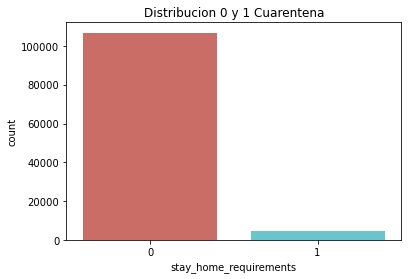

In [73]:
sns.countplot(x=data_final['stay_home_requirements'], palette='hls')
plt.title('Distribucion 0 y 1 Cuarentena')
plt.show()

In [74]:
for index, row in data_final.iterrows():
    if data_final.loc[index, 'international_travel_controls'] == 4: 
        data_final.loc[index, 'international_travel_controls'] = 1  
    else:
        data_final.loc[index, 'international_travel_controls'] = 0 
        

In [75]:
data_final.international_travel_controls.unique()

array([0, 1], dtype=int64)

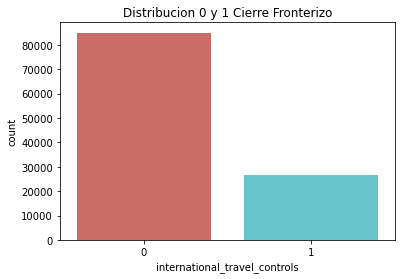

In [76]:
sns.countplot(x=data_final['international_travel_controls'], palette='hls')
plt.title('Distribucion 0 y 1 Cierre Fronterizo')
plt.show()

In [77]:
for index, row in data_final.iterrows():
    if (data_final.loc[index, 'vaccination_policy'] == 4 or data_final.loc[index, 'vaccination_policy'] == 5) : 
        data_final.loc[index, 'vaccination_policy'] = 1 
    else:
        data_final.loc[index, 'vaccination_policy'] = 0 

In [78]:
data_final.vaccination_policy.unique()

array([0, 1], dtype=int64)

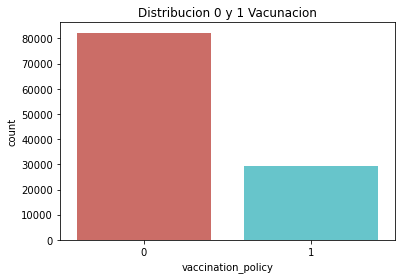

In [79]:
sns.countplot(x=data_final['vaccination_policy'], palette='hls')
plt.title('Distribucion 0 y 1 Vacunacion')
plt.show()

In [80]:
data_final.head()

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19,Muertesxdia,Variación_muertes,Variacion_muertes_Binaria,stay_home_requirements,international_travel_controls,vaccination_policy
0,Afghanistan,AFG,2020-03-23,0.0009,0.0009,1.0,40.0,1.0,1.0,0.0,0,0,0
1,Afghanistan,AFG,2020-03-24,0.0009,0.0009,1.0,42.0,0.0,-1.0,1.0,0,0,0
2,Afghanistan,AFG,2020-03-25,0.0009,0.0009,1.0,74.0,0.0,0.0,1.0,0,0,0
3,Afghanistan,AFG,2020-03-26,0.0009,0.0009,2.0,80.0,1.0,1.0,0.0,0,0,0
4,Afghanistan,AFG,2020-03-27,0.0009,0.0009,2.0,91.0,0.0,-1.0,1.0,0,0,0


Ahora, dentro de mi dataset ya tengo los atributos de interes preparados y listos para **aplicar un Modelo de Regresión Logística**.
Procedo por lo tanto con dicho modelo: 

## Modelo: Regresión logística.

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV

Procedo a elegir nuevamente países para realizar el modelo, para luego limitar el dataset, ya que hay muchos.
 Voy a **elegir primero los 12 países elegidos al principio** de este proyecto, y que fuimos estudiando el comportamiento de K en los mismos, para aplicar luego un modelo de regresión logística y ver como funciona.

In [82]:
paises_elegidos = ['Argentina', 'China', 'Spain','United States','Iran','Mexico', 'Brazil', 'Italy', 'Sweden', 'South Africa', 'Norway','Russia']
data_limited = data_final[data_final['Entity'].isin(paises_elegidos)]
data_limited.head(10)

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19,Muertesxdia,Variación_muertes,Variacion_muertes_Binaria,stay_home_requirements,international_travel_controls,vaccination_policy
3220,Argentina,ARG,2020-01-01,4.0,tests performed,0.0009,0.0009,0.0,0.0,1.0,0,0,0
3221,Argentina,ARG,2020-01-02,53.0,tests performed,0.0009,0.0009,0.0,0.0,1.0,0,0,0
3222,Argentina,ARG,2020-01-03,58.0,tests performed,0.0009,0.0009,0.0,0.0,1.0,0,0,0
3223,Argentina,ARG,2020-01-04,133.0,tests performed,0.0009,0.0009,0.0,0.0,1.0,0,0,0
3224,Argentina,ARG,2020-01-05,146.0,tests performed,0.0009,0.0009,0.0,0.0,1.0,0,0,0
3225,Argentina,ARG,2020-01-06,200.0,tests performed,0.0009,0.0009,0.0,0.0,1.0,0,0,0
3226,Argentina,ARG,2020-01-07,230.0,tests performed,0.0009,0.0009,0.0,0.0,1.0,0,0,0
3227,Argentina,ARG,2020-01-08,235.0,tests performed,0.0009,0.0009,0.0,0.0,1.0,0,0,0
3228,Argentina,ARG,2020-01-09,236.0,tests performed,0.0009,0.0009,0.0,0.0,1.0,0,0,0
3229,Argentina,ARG,2020-01-10,315.0,tests performed,0.0009,0.0009,0.0,0.0,1.0,0,0,0


In [83]:
data_limited.Entity.unique()

array(['Argentina', 'Brazil', 'China', 'Iran', 'Italy', 'Mexico',
       'Norway', 'Russia', 'South Africa', 'Spain', 'Sweden',
       'United States'], dtype=object)

In [84]:
#Me quedo solo con las variables de interes : x --> politicas aplicadas, y --> variacion binaria de muertes
X = data_limited.drop(columns = ['Entity','Code','Day','total_tests','142601-annotations','Total confirmed deaths due to COVID-19','Total confirmed cases of COVID-19', 'Muertesxdia', 'Variación_muertes', 'Variacion_muertes_Binaria'], axis=1) 
y = data_limited['Variacion_muertes_Binaria']

In [85]:
X

,stay_home_requirements,international_travel_controls,vaccination_policy
3220,0,0,0
3221,0,0,0
3222,0,0,0
3223,0,0,0
3224,0,0,0
...,...,...,...
106684,0,0,0
106685,0,0,0
106686,0,0,0
106687,0,0,0


In [86]:
X.stay_home_requirements.value_counts()

0    7388
1     676
Name: stay_home_requirements, dtype: int64

In [87]:
X.international_travel_controls.value_counts()

0    7044
1    1020
Name: international_travel_controls, dtype: int64

In [88]:
X.vaccination_policy.value_counts()

0    5918
1    2146
Name: vaccination_policy, dtype: int64

In [89]:
y

3220      1.0
3221      1.0
3222      1.0
3223      1.0
3224      1.0
         ... 
106684    1.0
106685    1.0
106686    1.0
106687    1.0
106688    1.0
Name: Variacion_muertes_Binaria, Length: 8064, dtype: float64

In [90]:
y.value_counts()

1.0    4936
0.0    3128
Name: Variacion_muertes_Binaria, dtype: int64

In [91]:
print('y tiene :', y.shape)
print('\nX tiene :', X.shape)

y tiene : (8064,)

X tiene : (8064, 3)


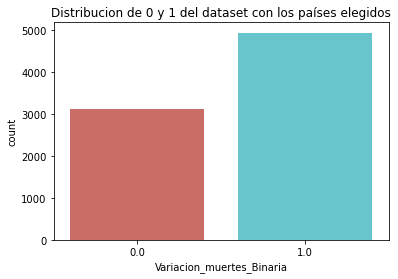

In [92]:
sns.countplot(x=y, palette='hls')
plt.title('Distribucion de 0 y 1 del dataset con los países elegidos')
plt.show()

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(5644, 3) (5644,) (2420, 3) (2420,)


Procedo a crear mi **modelo de regresión logística** y a ajustarlo a mis valores de Train

In [94]:
regresion_model = LogisticRegression()
regresion_model.fit(X_train,y_train)

LogisticRegression()

In [95]:
y_pred = regresion_model.predict(X_test) 
y_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [96]:
efectividad_politicas = regresion_model.coef_
efectividad_cuarentena = efectividad_politicas[0][0]
efectividad_cierre_frontera = efectividad_politicas[0][1]
efectividad_vacunacion = efectividad_politicas[0][2]

In [97]:
print('La efectividad de cuarentena fue del: ' + str(efectividad_cuarentena))
print('La efectividad de cierre de la frontera fue del: ' + str(efectividad_cierre_frontera))
print('La efectividad de vacunacion fue del: ' + str(efectividad_vacunacion))

La efectividad de cuarentena fue del: 1.1833393854276715
La efectividad de cierre de la frontera fue del: -0.34264544739046654
La efectividad de vacunacion fue del: 0.009327135225712812


Lo que puedo observar a **partir de estos resultados del modelo** desarrollado es que : 

- **La mejor política aplicada es la de : Cuarentena**.
- Le sigue: Vacunación.
- Finalmente: Cierre Fronterizo.

Lo cual concuerda con mi lógica de pensamiento.

Procedo a aplicar el mismo modelo, pero a **mayor cantidad de países**, los mismos elegidos anteriormente (segunda elección), los cuales fueron elegidos al azar y con mayor distribución geográfica.

In [98]:
paises_nuevos = ['Argentina', 'China', 'Spain','United States','Iran','Mexico', 'Brazil', 'Italy', 'Sweden', 'South Africa', 'Norway','Russia',
                         'Africa' ,'Austria', 'Georgia','Germany','New Zealand','Nigeria','Paraguay','Netherlands','Serbia', 'Jamaica','Hong Kong' ,
                         'Japan' ,'Poland','Portugal','Vietnam','Ukraine','Panama','Belgium','Costa Rica','Bulgaria','Bolivia','Australia','Andorra',
                         'Algeria','Ethiopia','Hungary', 'Guatemala','Malaysia' ,'Maldives','Nepal','Mongolia','Kyrgyzstan','Kazakhstan','Madagascar']

In [99]:
new_data_limited = data_final[data_final['Entity'].isin(paises_nuevos)]
new_data_limited.head(10)

,Entity,Code,Day,total_tests,142601-annotations,Total confirmed deaths due to COVID-19,Total confirmed cases of COVID-19,Muertesxdia,Variación_muertes,Variacion_muertes_Binaria,stay_home_requirements,international_travel_controls,vaccination_policy
1300,Algeria,DZA,2020-03-12,0.0009,0.0009,1.0,24.0,-3109.0,-3110.0,1.0,0,0,0
1301,Algeria,DZA,2020-03-13,0.0009,0.0009,2.0,26.0,1.0,3110.0,0.0,0,0,0
1302,Algeria,DZA,2020-03-14,0.0009,0.0009,3.0,37.0,1.0,0.0,1.0,0,0,0
1303,Algeria,DZA,2020-03-15,0.0009,0.0009,4.0,48.0,1.0,0.0,1.0,0,0,0
1304,Algeria,DZA,2020-03-16,0.0009,0.0009,4.0,54.0,0.0,-1.0,1.0,0,0,0
1305,Algeria,DZA,2020-03-17,0.0009,0.0009,4.0,60.0,0.0,0.0,1.0,0,1,0
1306,Algeria,DZA,2020-03-18,0.0009,0.0009,7.0,74.0,3.0,3.0,0.0,0,1,0
1307,Algeria,DZA,2020-03-19,0.0009,0.0009,9.0,87.0,2.0,-1.0,1.0,0,1,0
1308,Algeria,DZA,2020-03-20,0.0009,0.0009,11.0,90.0,2.0,0.0,1.0,0,1,0
1309,Algeria,DZA,2020-03-21,0.0009,0.0009,15.0,139.0,4.0,2.0,0.0,0,1,0


In [100]:
new_data_limited.Entity.unique()

array(['Algeria', 'Andorra', 'Argentina', 'Australia', 'Austria',
       'Belgium', 'Bolivia', 'Brazil', 'Bulgaria', 'China', 'Costa Rica',
       'Ethiopia', 'Georgia', 'Germany', 'Guatemala', 'Hong Kong',
       'Hungary', 'Iran', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan',
       'Kyrgyzstan', 'Madagascar', 'Malaysia', 'Mexico', 'Mongolia',
       'Nepal', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway',
       'Panama', 'Paraguay', 'Poland', 'Portugal', 'Russia', 'Serbia',
       'South Africa', 'Spain', 'Sweden', 'Ukraine', 'United States',
       'Vietnam'], dtype=object)

In [101]:
X_new= new_data_limited.drop(columns = ['Entity','Code','Day','total_tests','142601-annotations','Total confirmed deaths due to COVID-19','Total confirmed cases of COVID-19', 'Muertesxdia', 'Variación_muertes', 'Variacion_muertes_Binaria'], axis=1) 
y_new= new_data_limited['Variacion_muertes_Binaria']

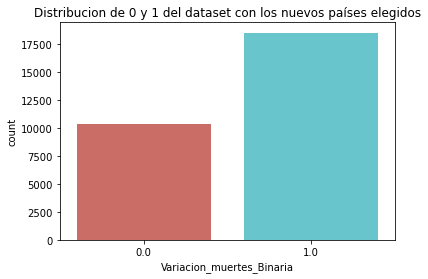

In [102]:
sns.countplot(x=y_new, palette='hls')
plt.title('Distribucion de 0 y 1 del dataset con los nuevos países elegidos')
plt.show()

In [120]:
8060/(2*np.bincount(y_new))

array([0.38997484, 0.21772015])

In [103]:
X_new.stay_home_requirements.value_counts()

0    27452
1     1392
Name: stay_home_requirements, dtype: int64

In [104]:
X_new.international_travel_controls.value_counts()

0    21793
1     7051
Name: international_travel_controls, dtype: int64

In [105]:
X_new.vaccination_policy.value_counts()

0    20671
1     8173
Name: vaccination_policy, dtype: int64

In [106]:
y.value_counts()

1.0    4936
0.0    3128
Name: Variacion_muertes_Binaria, dtype: int64

In [107]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(5644, 3) (5644,) (2420, 3) (2420,)


In [108]:
new_regresion_model = LogisticRegression()
new_regresion_model.fit(X_train_new,y_train_new)

LogisticRegression()

In [109]:
y_pred_new = new_regresion_model.predict(X_test_new) 
y_pred_new

array([1., 1., 1., ..., 1., 1., 1.])

In [110]:
efectividad_politicas = new_regresion_model.coef_
efectividad_cuarentena = efectividad_politicas[0][0]
efectividad_cierre_frontera = efectividad_politicas[0][1]
efectividad_vacunacion = efectividad_politicas[0][2]

In [111]:
print('La efectividad de cuarentena fue del: ' + str(efectividad_cuarentena))
print('La efectividad de cierre de la frontera fue del: ' + str(efectividad_cierre_frontera))
print('La efectividad de vacunacion fue del: ' + str(efectividad_vacunacion))

La efectividad de cuarentena fue del: 0.4491101825157889
La efectividad de cierre de la frontera fue del: 0.2534644737034115
La efectividad de vacunacion fue del: -0.013602932539686186


Aquí, con este **nuevo modelo**, puedo observar que: 
- **La mejor política aplicada fue de: cuarentena**
- Luego sigue: Cierre de frontera
- Finalmente Vacunación

Este resultado es casi igual que el anterior, pero mi lógica me indica que el modelo anterior trajo mejores resultados. Veamos en cuanto al score de cada modelo:

In [112]:
print('Score primer modelo: ',new_regresion_model.score(X_test,y_test))

Score primer modelo:  0.6173553719008265


In [113]:
print('Score segundo modelo: ',new_regresion_model.score(X_test_new,y_test_new))

Score segundo modelo:  0.6324243124566674


In [114]:
puntajef1 = f1_score(y_test, y_pred)
print('Puntaje F1 del primer modelo:')
print(puntajef1)

Puntaje F1 del primer modelo:
0.7634133878385284


In [115]:
puntajef1_new = f1_score(y_test_new, y_pred_new)
print('Puntaje F1 del segundo modelo:')
print(puntajef1_new)

Puntaje F1 del segundo modelo:
0.7748283428895023


Basándome en estas 2 medidas, veo que **el segundo modelo tiene mayor puntaje**, esto era de esperar ya que fue entrenado con mayor cantidad de datos.

In [141]:
params = {'class_weight':['[0.39, 0.61]','balanced'],
              'penalty':['l2', 'elasticnet','none'],
               'C':[1.0,2.0, 3.0,4.0,5.0], 'fit_intercept':[True, False],
               'max_iter':[100,150,200],
               'warm_start':['True','False']}

In [142]:
new_regresion_model_opt = GridSearchCV(new_regresion_model, param_grid=params, cv=5)

In [143]:
import warnings 
warnings.filterwarnings('ignore')
new_regresion_model_opt.fit(X_train_new, y_train_new)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1.0, 2.0, 3.0, 4.0, 5.0],
                         'class_weight': ['[0.39, 0.61]', 'balanced'],
                         'fit_intercept': [True, False],
                         'max_iter': [100, 150, 200],
                         'penalty': ['l2', 'elasticnet', 'none'],
                         'warm_start': ['True', 'False']})

In [144]:
print("Best Params: "+str(new_regresion_model_opt.best_params_)+'\n')
print("Best score: "+str(new_regresion_model_opt.best_score_)+'\n')
print("Best Estimator: "+str(new_regresion_model_opt.best_estimator_)+'\n')

Best Params: {'C': 1.0, 'class_weight': '[0.39, 0.61]', 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l2', 'warm_start': 'True'}

Best score: 0.645715700842001

Best Estimator: LogisticRegression(class_weight='[0.39, 0.61]', warm_start='True')



In [146]:
best_scores = pd.DataFrame(new_regresion_model_opt.cv_results_)
best_scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_fit_intercept,param_max_iter,param_penalty,param_warm_start,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011026,0.001071,0.001,1.200645e-06,1.0,"[0.39, 0.61]",True,100,l2,True,"{'C': 1.0, 'class_weight': '[0.39, 0.61]', 'fi...",0.645864,0.645864,0.645617,0.645617,0.645617,0.645716,0.000121,1
1,0.009000,0.000632,0.001,1.507891e-07,1.0,"[0.39, 0.61]",True,100,l2,False,"{'C': 1.0, 'class_weight': '[0.39, 0.61]', 'fi...",0.645864,0.645864,0.645617,0.645617,0.645617,0.645716,0.000121,1
2,0.000000,0.000000,0.000,0.000000e+00,1.0,"[0.39, 0.61]",True,100,elasticnet,True,"{'C': 1.0, 'class_weight': '[0.39, 0.61]', 'fi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,259
3,0.000800,0.000400,0.000,0.000000e+00,1.0,"[0.39, 0.61]",True,100,elasticnet,False,"{'C': 1.0, 'class_weight': '[0.39, 0.61]', 'fi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,260
4,0.008800,0.000400,0.001,3.162980e-07,1.0,"[0.39, 0.61]",True,100,none,True,"{'C': 1.0, 'class_weight': '[0.39, 0.61]', 'fi...",0.645864,0.645864,0.645617,0.645617,0.645617,0.645716,0.000121,1


In [147]:
y_pred_new_opt = new_regresion_model_opt.predict(X_test_new) 
puntajef1_new_opt = f1_score(y_test_new, y_pred_new_opt)
print('Puntaje F1 del modelo optimizado:')
print(puntajef1_new_opt)

Puntaje F1 del modelo optimizado:
0.7748283428895023


Puedo observar como **mejoraron los scores de mi nuevo modelo optimizado**

# TERCERA PARTE:  Informe Final

Primero que todo quiero comenzar hablando sobre el dataset inicial. Como podemos observar, el tamaño del mismo y la informaciòn que propone, me permite ( si quisiera ) continuar haciendome preguntas y respondiendolas, sacando conclusiones, gràficos, estadìsticos, etc. a partir del mismo. 

Voy a proceder entonces a hablar sobre el paramtero K, a partir de los resultados obtenidos en este informe.

Al principio se realizò un anàlisis del crecimiento exponencial en paìses individualmente, se tomò Argentina, China y luego la entidad denominada World en el dataset.

Los resultados obtenidos fueron los siguientes:


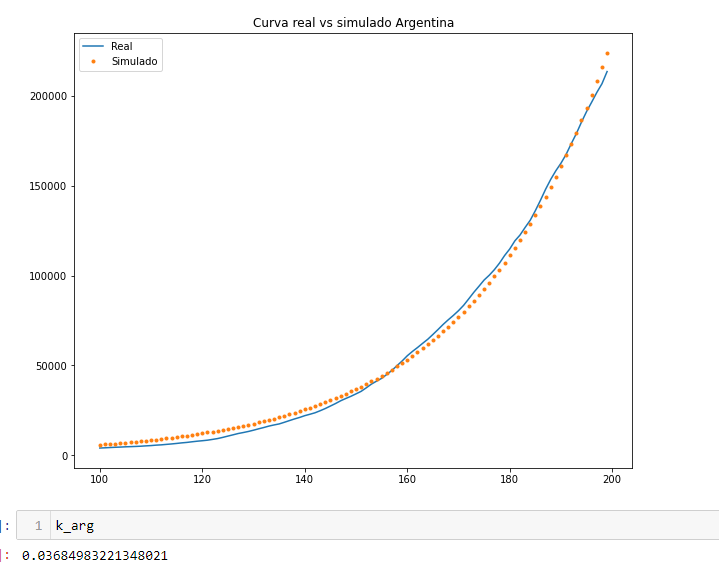

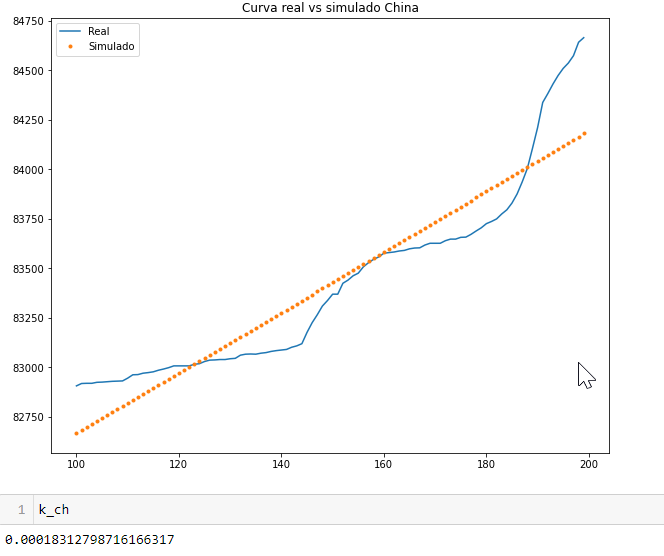

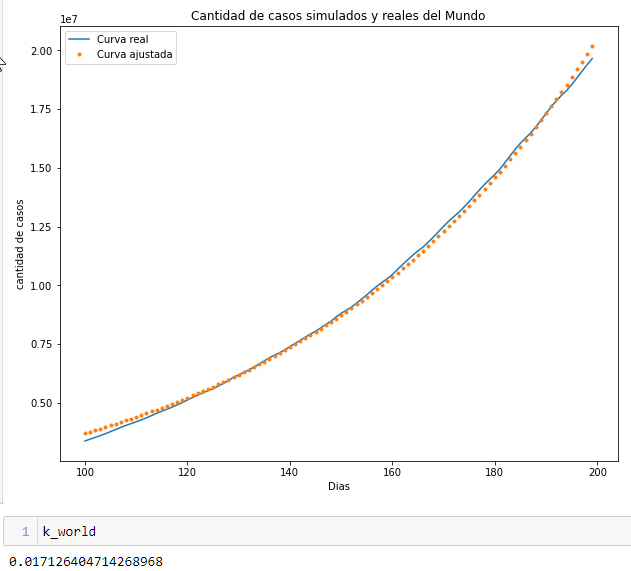

Con estos resultados, y teniendo en cuenta que el origen de la pandemia fue en China, me dì cuenta que el K es un valor que si es cercano a 0, significa que la mayoría de los contagios se producen a partir de una minoría de casos, como podemos observar en China el valor de K es de 0.00018, ya que fue el origen de la pandemia, y se comenzò con minoria de casos propagandose de manera muy ràpida. Mientras que en Argentina es mucho màs grande. El valor de K, tambièn esta relacionado a la cantidad de personas que puede contagiar alguien con Covid, mientras màs personas contagie alguien con Covid, va a haber un crecimiento exponencial màs grande, pudiendo observarse en Argentina un crecimiento exponencial mucho màs notable que en China y a su vez un K màs grande tambièn.



Como vimos anteriormente, el dataset presentaba, aparte de todos los paìses individualmente, un Entity denominado World, la cual suponìa resumir los contagios mundiales. 

Procedì a realizar el anàlisis correspondiente a dicha Entity, y obtuve el k correspondiente a world :

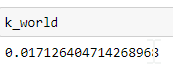 

Luego, mis hipòtesis eran: 

h0: el valor de k_world corresponde al K de la poblaciòn (de todos los paìses del dataset). 

h1: el valor de k_world NO corresponde al K de la poblaciòn (de todos los paìses del dataset).

Para comprobar estas hipòtesis, lo que hice fue seleccionar un conjunto de paìses (donde se hayan establecido diferentes medidas restrictivas y que esten geogràficamente separados), para asì obtener el k de cada uno de estos paìses (una distribuciòn de k), para luego poder establecer un intervalo de confianza y poder ver si el valor de el k world obtenido anteriormente, cae dentro de dicho intervalo de confianza.

El resultado obtenido fue :

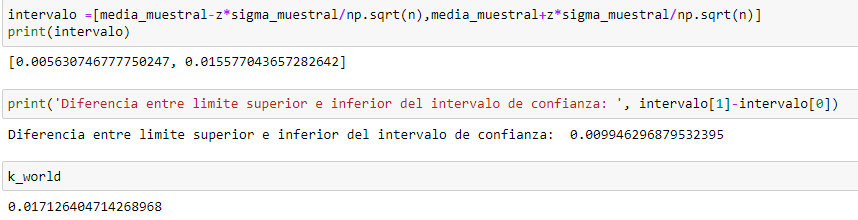

Por lo tanto, pude afirmar , con un nivel de confianza del 95%, que se rechaza h0.

Luego, para estar completamente seguro de este rechazo de mi h0, lo que hice fue agrandar mi muestra, por lo que decidì tomar màs paìses en mi conjunto muestral, para ver que pasa con mi intervalo de confianza, y donde cae el k_world.

Los resultados obtenidos: 

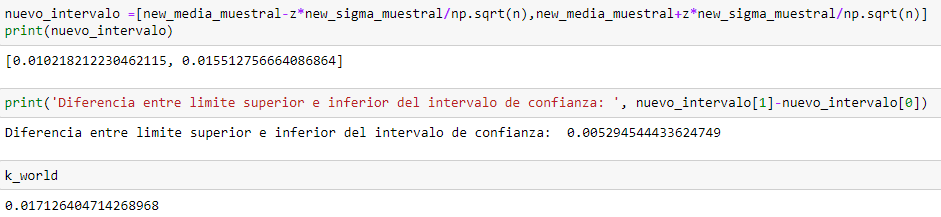

Demostraron un claro rechazo nuevamente de la h0, lo cual tiene sentido ya que se esperaba una reducciòn del intervalo. Con lo que puedo afirmar que el K_world obtenido, no es un valor que representa el K de la poblaciòn completa. 

Luego, comencè a trabajar incluyendo los datasets que mostraban los tipos de polìticas aplicadas dependiendo del paìs. En este momento, se realizò tratamientos a los datasets para poder anexarlos a mi dataset principal, de forma de tener un conjunto de datos aptos para poder ser analizados y para luego poder aplicar algun modelo a los mismos.

Como pude observar anteriormente, los valores representativos a las polìticas aplicadas correspondìan a valores NO binarios. Esto era un problema ya que para poder luego, aplicar un modelo de regresiòn logìstica, necesitaba valores binarios.

Por lo tanto se realizaron las siguientes transformaciones: 

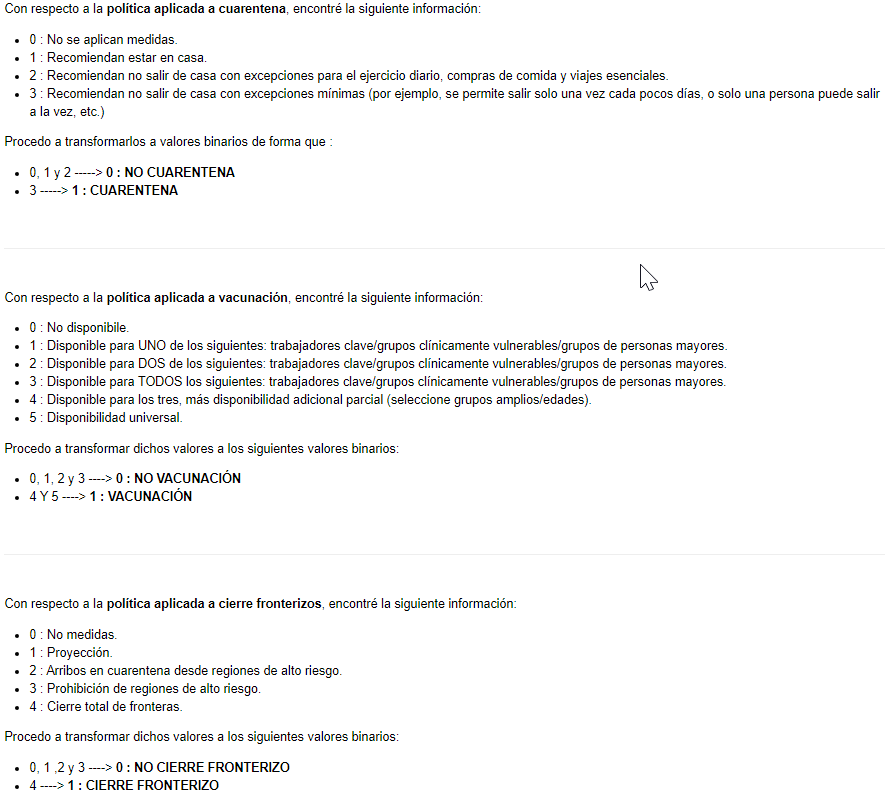


Esto fue pura y exclusivamente arbritario, segùn mi criterio.

Luego para los valores de Y, se hizo el siguiente tratamiento: 

Apliquè una lògica que me permita detectar si las muertes crecìan o decrecìan por dìa. 

Cuando se obtiene un crecimiento de muertes --> Y=0

Cuando se obtiene un decrecimiento de muertes --> Y=1

De esta forma tengo mis datos listos para poder entrar a un modelo de regresiòn logìstica, sabiendo que una buena polìtica aplicada, darìa un Y=1, mientras que malas polìticas se acompañan de un Y=0.

Luego, volvì marcha atràs y tomè nuevamente los paìses elegidos anteriormente (en primera instancia, conjunto de paìses mas pequeño), para limitar mis datos a dichos paìses y aplicar un modelo de regresiòn logìstica a su crecimiento exponencial, teniendo en cuenta las polìticas aplicadas(X) y las muertes (Y).

Al dividir mi dataset en X e Y, se observò la siguiente distribuciòn de muertes: 

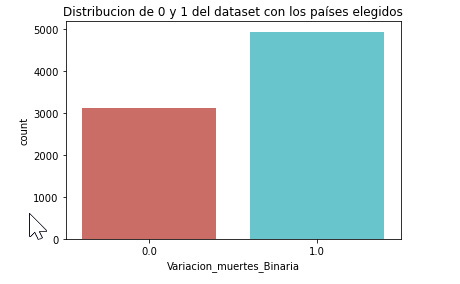

El modelo aplicado, obtuvo los siguientes resultados: 

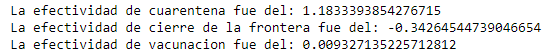

Con un score de : 

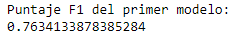

Luego procedì a agrandar mis dataset, ampliando la cantidad de paìses elegidos. Y los scores obtenidos para este segundo modelo fueron los siguientes: 

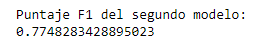

AMBOS modelos brindaron los mismos resultados en cuanto a las polìticas aplicadas: 

Primer modelo:

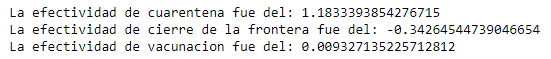

Segundo modelo: 

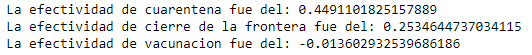

La efectividad disminuye ya que al aumentar la cantidad de paìses, la cantidad de muertes tambièn es màs alta por lo que tiene sentido esta disminuciòn de efectividad en polìticas aplicadas.

Al fin y al cabo, ambos modelos indican que la mejor manera de enfrentar una pandemia es la CUARENTENA. 

Quiero aclarar aquì que yo basè mis resultados en Muertes por covid, mientras que se podrìa haber realizado un estudio en cuanto a los casos por covid. En lo personal, me pareciò màs importante analizar las muertes que los casos. 

Ademàs, tambièn aclarar que este anàlisis puede continuar, respondièndo infinitas preguntas, lo cual se hace cada vez mas interesante generando buenas respuestas, acomàñada de gràficos y conclusiones. Lo cual espero poder continuar pròximamente.

Finalmente dejo aquì adjunto el link de mi github donde procedo a subir dicho proyecto: 

https://github.com/Gonzag95/Data-Science 

Como conclusiòn quiero cerrar diciendo que la Pandemia fue un hecho trascendental para todos, causò la muerte de muchas personas, cambiò a muchas personas y generò tristezas y felicidades, pero lo màs importante es aprender en base a lo sucedido, a hechos pasados, y esto es lo que me genera felicidad, que existen personas que estudian estos hechos, para poder obtener conclusiones y de esta manera, poder actuar de forma òptima y con mejores resultados en una pròxima situaciòn similar, para no cometer los mismos errores, es por eso que he estudiado esta carrera de Data Scientist lo cual me enorgullece y felicitarlos a quienes hacen lo mismo, como quien me corrige.

Sin màs que decir, muchas gracias.

Gonzalo Emanuel Gil.